In [1]:
#Importing Data
import os
import re
import pandas as pd
from datetime import datetime
import glob


file_paths = glob.glob("*.txt")

# Regular expression to match WhatsApp message pattern
pattern = r'(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}) - (.*?): (.*)'

# Lists to store data
all_data = []

# Read each chat file
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as f:
        chat_lines = f.readlines()

    # Extract chat name (file name without .txt extension)
    chat_name = os.path.basename(file_path).replace('.txt', '')

    # Parse messages
    for line in chat_lines:
        match = re.match(pattern, line)
        if match:
            date, time, sender, message = match.groups()
            all_data.append([chat_name, date, time, sender, message])

# Create DataFrame
df = pd.DataFrame(all_data, columns=['Chat', 'Date', 'Time', 'Sender', 'Message'])
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M')

# Extract useful time features
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.date
df['Weekday'] = df['Datetime'].dt.day_name()
df['Month'] = df['Datetime'].dt.month_name()
df['Year'] = df['Datetime'].dt.year

# Display first few rows
df

Chat        Date   Time  \
0                             WhatsApp Chat with Devraj  01/07/2021  17:15   
1                             WhatsApp Chat with Devraj  01/07/2021  17:16   
2                             WhatsApp Chat with Devraj  02/07/2021  09:39   
3                             WhatsApp Chat with Devraj  02/07/2021  09:47   
4                             WhatsApp Chat with Devraj  02/07/2021  09:53   
...                                                 ...         ...    ...   
99540  WhatsApp Chat with Ratnesh Pandey Sir IIT Bhilai  24/01/2025  11:57   
99541  WhatsApp Chat with Ratnesh Pandey Sir IIT Bhilai  24/01/2025  11:57   
99542  WhatsApp Chat with Ratnesh Pandey Sir IIT Bhilai  24/01/2025  11:58   
99543  WhatsApp Chat with Ratnesh Pandey Sir IIT Bhilai  04/02/2025  19:22   
99544  WhatsApp Chat with Ratnesh Pandey Sir IIT Bhilai  04/02/2025  19:22   

                              Sender  \
0                             Devraj   
1                             Devraj   
2                             Devraj   
3                             Devraj   
4                             Devraj   
...                              ...   
99540                          Koosh   
99541                          Koosh   
99542  Ratnesh Pandey Sir IIT Bhilai   
99543                          Koosh   
99544  Ratnesh Pandey Sir IIT Bhilai   

                                                 Message            Datetime  \
0                                        <Media omitted> 2021-07-01 17:15:00   
1                                        <Media omitted> 2021-07-01 17:16:00   
2                                      Missed voice call 2021-07-02 09:39:00   
3                                        <Media omitted> 2021-07-02 09:47:00   
4                                      Missed voice call 2021-07-02 09:53:00   
...                                                  ...                 ...   
99540  Dolcera - Mamtha Yadav - 9985858019   , they a... 2025-01-24 11:57:00   
99541              Sir you can once have a word with her 2025-01-24 11:57:00   
99542                        pls share with Satyajit sir 2025-01-24 11:58:00   
99543  Good evening sir , some students have faced is... 2025-02-04 19:22:00   
99544                                     Ask akbassador 2025-02-04 19:22:00   

       Hour         Day   Weekday     Month  Year  
0        17  2021-07-01  Thursday      July  2021  
1        17  2021-07-01  Thursday      July  2021  
2         9  2021-07-02    Friday      July  2021  
3         9  2021-07-02    Friday      July  2021  
4         9  2021-07-02    Friday      July  2021  
...     ...         ...       ...       ...   ...  
99540    11  2025-01-24    Friday   January  2025  
99541    11  2025-01-24    Friday   January  2025  
99542    11  2025-01-24    Friday   January  2025  
99543    19  2025-02-04   Tuesday  February  2025  
99544    19  2025-02-04   Tuesday  February  2025  

[99545 rows x 11 columns]

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**ANALYZING CHATS**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


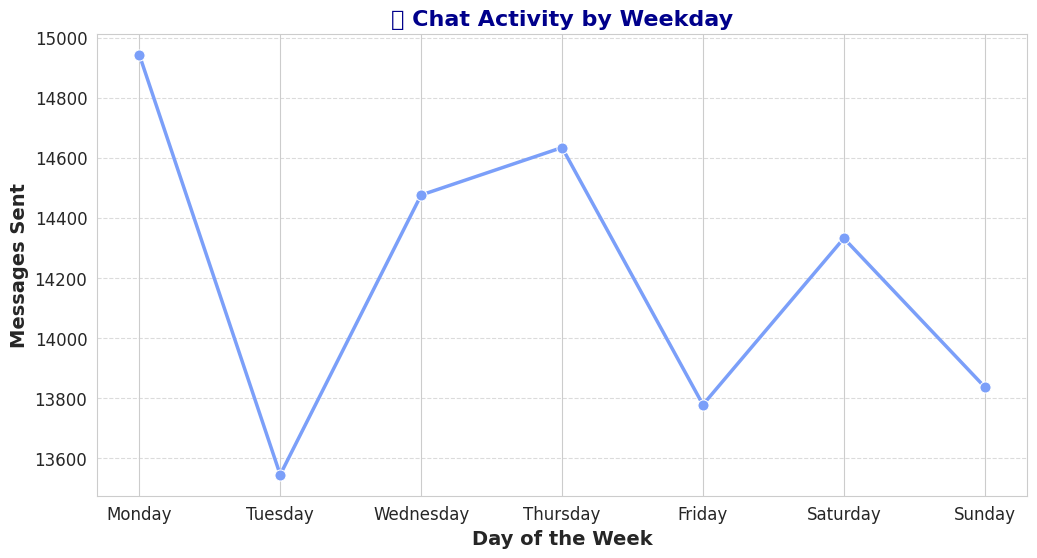

In [3]:


# Define correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by Weekday and sort in correct order
weekday_activity = df.groupby('Weekday').size().reset_index(name='Message_Count')
weekday_activity['Weekday'] = pd.Categorical(weekday_activity['Weekday'], categories=weekday_order, ordered=True)
weekday_activity = weekday_activity.sort_values('Weekday')

# Plot Weekday Activity
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(12, 6))

# Improved line plot
sns.lineplot(
    x=weekday_activity['Weekday'],
    y=weekday_activity['Message_Count'],
    marker='o',
    markersize=8,
    linewidth=2.5,
    color=sns.color_palette("coolwarm", as_cmap=True)(0.2)  # Custom color
)

# Labels and title
plt.xlabel('Day of the Week', fontsize=14, fontweight='bold')
plt.ylabel('Messages Sent', fontsize=14, fontweight='bold')
plt.title('📅 Chat Activity by Weekday', fontsize=16, fontweight='bold', color='darkblue')

# Grid customization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels if necessary
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


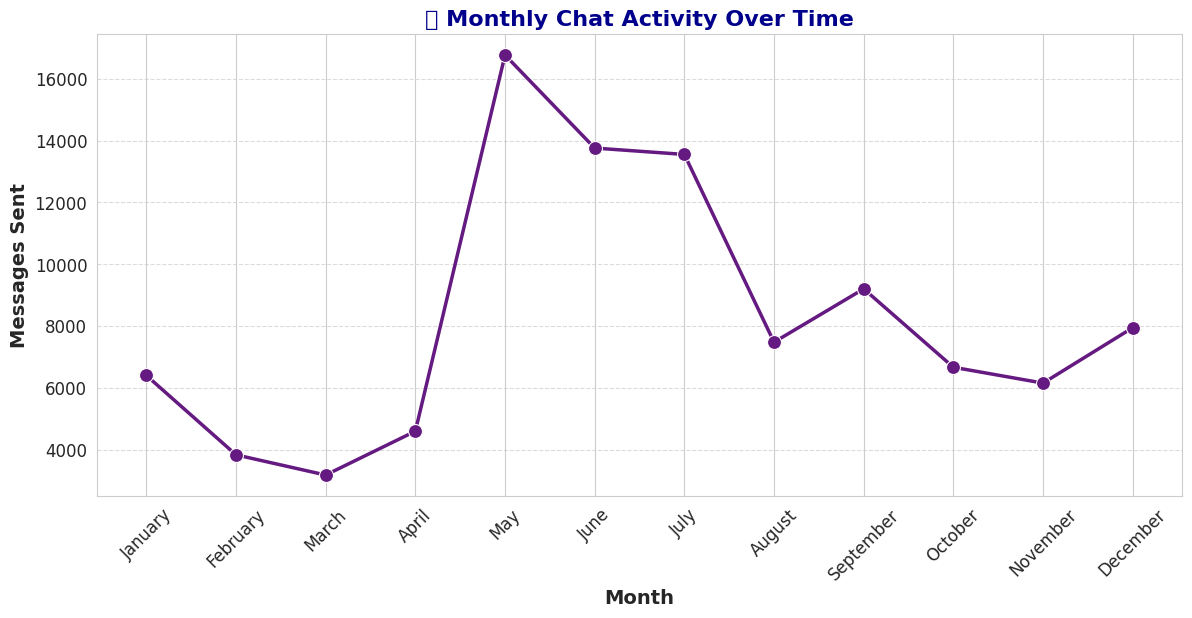

In [4]:
import calendar

# Extract Month Name and Month Number
df['Month'] = df['Datetime'].dt.month
df['Month_Name'] = df['Datetime'].dt.month.apply(lambda x: calendar.month_name[x])

# Group by Month and sort in correct order (Jan → Dec)
monthly_activity = df.groupby(['Month', 'Month_Name']).size().reset_index(name='Message_Count')
monthly_activity = monthly_activity.sort_values('Month')

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(14, 6))

# Define color
color = sns.color_palette("magma", as_cmap=True)(0.3)

# Improved line plot
sns.lineplot(
    x=monthly_activity['Month_Name'],
    y=monthly_activity['Message_Count'],
    marker="o",
    markersize=10,
    linewidth=2.5,
    color=color
)

# Labels and title
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Messages Sent', fontsize=14, fontweight='bold')
plt.title('📆 Monthly Chat Activity Over Time', fontsize=16, fontweight='bold', color='darkblue')

# Grid customization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()



<ipython-input-5-711debda1a49>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_activity.index, y=hourly_activity.values, palette='coolwarm')


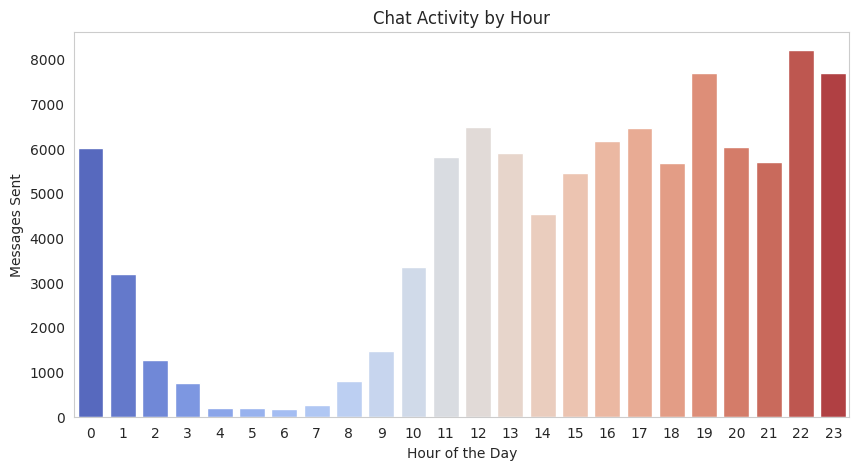

In [5]:
# Count messages per hour
hourly_activity = df.groupby('Hour').size()

# Plot hourly activity
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_activity.index, y=hourly_activity.values, palette='coolwarm')
plt.xlabel('Hour of the Day')
plt.ylabel('Messages Sent')
plt.title('Chat Activity by Hour')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


In [6]:
# Remove 'WhatsApp Chat with ' from chat titles
df['Chat'] = df['Chat'].str.replace(r'WhatsApp Chat with ', '', regex=True)

# Display sample data
df[['Chat']].drop_duplicates()


Chat
0                                          Devraj
3945                                   Co-Coordie
29211                            Anand IIT Bhilai
29625                             Smit IIT Bhilai
32980                       Suraj 2022 IIT Bhilai
33643                                     Junior6
33903                           Ujjwal IIT Bhilai
47368                                     Junior3
47480                            Arpan IIT Bhilai
56320                                     Junior5
56601                    Rishit Bhaiya IIT Bhilai
57092                                      Family
67911                                     Junior8
68040                  Talla Sai Surya IIT Bhilai
75587                                     Junior9
75794                         Nidheesh IIT Bhilai
75946  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech
76511                             Harshita School
81595                           Yuvraj IIT Bhilai
82959                               Harshit Verma
83953              Arnav Gautam Bhaiya IIT Bhilai
84573                           Srijan IIT Bhilai
87953                                     Junior1
88336                                     Junior7
88511                            Arbaz IIT Bhilai
90477                                     Junior2
90958                                      Joseph
97898                                     Junior4
98109                            Parth IIT Bhilai
99316               Ratnesh Pandey Sir IIT Bhilai

**Most Active Users and Sentiment Analysis**

In [7]:

total_messages_per_chat = df.groupby('Chat').size().reset_index(name='Total_Messages')


your_messages_per_chat = df[df['Sender'] == "Koosh"].groupby('Chat').size().reset_index(name='Your_Messages')

# Merge both counts
chat_stats = total_messages_per_chat.merge(your_messages_per_chat, on='Chat', how='left').fillna(0)

# Calculate percentage of messages sent by you
chat_stats['Percentage_Sent_By_You'] = (chat_stats['Your_Messages'] / chat_stats['Total_Messages']) * 100


# Sort by highest % of messages sent
chat_stats = chat_stats.sort_values(by='Percentage_Sent_By_You', ascending=False)

# Display top chats
chat_stats


Chat  Total_Messages  Your_Messages  \
20                            Parth IIT Bhilai            1207            702   
3                             Arpan IIT Bhilai            8840           4964   
22               Ratnesh Pandey Sir IIT Bhilai             229            127   
24                             Smit IIT Bhilai            3355           1849   
7                                Harshit Verma             994            544   
0                             Anand IIT Bhilai             414            226   
11                                     Junior2             481            261   
29                           Yuvraj IIT Bhilai            1364            738   
26                       Suraj 2022 IIT Bhilai             663            351   
9                                       Joseph            6940           3660   
19                         Nidheesh IIT Bhilai             152             80   
27                  Talla Sai Surya IIT Bhilai            7547           3920   
28                           Ujjwal IIT Bhilai           13465           6911   
17                                     Junior8             129             66   
1                             Arbaz IIT Bhilai            1966            994   
13                                     Junior4             211            103   
25                           Srijan IIT Bhilai            3380           1641   
18                                     Junior9             207            100   
6                                       Family           10819           5223   
23                    Rishit Bhaiya IIT Bhilai             491            236   
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech             565            268   
8                              Harshita School            5084           2279   
10                                     Junior1             383            171   
15                                     Junior6             260            114   
5                                       Devraj            3945           1701   
16                                     Junior7             175             75   
12                                     Junior3             112             48   
2               Arnav Gautam Bhaiya IIT Bhilai             620            256   
4                                   Co-Coordie           25266           9446   
14                                     Junior5             281             98   

    Percentage_Sent_By_You  
20               58.160729  
3                56.153846  
22               55.458515  
24               55.111773  
7                54.728370  
0                54.589372  
11               54.261954  
29               54.105572  
26               52.941176  
9                52.737752  
19               52.631579  
27               51.941169  
28               51.325659  
17               51.162791  
1                50.559512  
13               48.815166  
25               48.550296  
18               48.309179  
6                48.276181  
23               48.065173  
21               47.433628  
8                44.826908  
10               44.647520  
15               43.846154  
5                43.117871  
16               42.857143  
12               42.857143  
2                41.290323  
4                37.386211  
14               34.875445

<ipython-input-8-a326e9772bca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


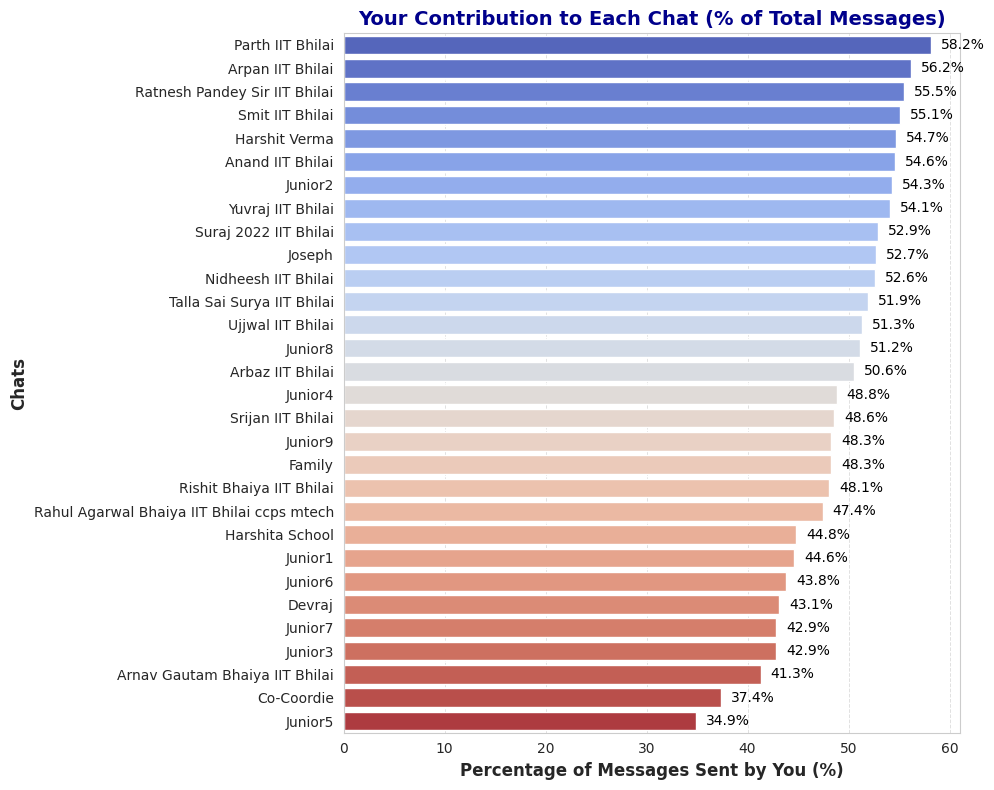

In [8]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Percentage_Sent_By_You',
    y='Chat',
    data=chat_stats,
    palette='coolwarm'
)

# Annotate each bar with its value
for i, value in enumerate(chat_stats['Percentage_Sent_By_You']):
    plt.text(value + 1, i, f"{value:.1f}%", va='center', ha='left', fontsize=10, color='black')

# Label and format
plt.xlabel('Percentage of Messages Sent by You (%)', fontsize=12, fontweight='bold')
plt.ylabel('Chats', fontsize=12, fontweight='bold')
plt.title('Your Contribution to Each Chat (% of Total Messages)', fontsize=14, fontweight='bold', color='darkblue')

# Soft grid lines for better readability
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

# Ensure no label cutoff
plt.tight_layout()
plt.show()


In [9]:

total_messages_per_chat = df.groupby('Chat').size().reset_index(name='Total_Messages')


your_messages_per_chat = df[df['Sender'] == "Koosh"].groupby('Chat').size().reset_index(name='Your_Messages')

# Merge both counts
chat_stats = total_messages_per_chat.merge(your_messages_per_chat, on='Chat', how='left').fillna(0)

# Calculate percentage of messages sent by you
chat_stats['Percentage_Sent_By_You'] = (chat_stats['Your_Messages'] / chat_stats['Total_Messages']) * 100

# Sort by highest % of messages sent
chat_stats = chat_stats.sort_values(by='Percentage_Sent_By_You', ascending=False)

# Display top chats
chat_stats


Chat  Total_Messages  Your_Messages  \
20                            Parth IIT Bhilai            1207            702   
3                             Arpan IIT Bhilai            8840           4964   
22               Ratnesh Pandey Sir IIT Bhilai             229            127   
24                             Smit IIT Bhilai            3355           1849   
7                                Harshit Verma             994            544   
0                             Anand IIT Bhilai             414            226   
11                                     Junior2             481            261   
29                           Yuvraj IIT Bhilai            1364            738   
26                       Suraj 2022 IIT Bhilai             663            351   
9                                       Joseph            6940           3660   
19                         Nidheesh IIT Bhilai             152             80   
27                  Talla Sai Surya IIT Bhilai            7547           3920   
28                           Ujjwal IIT Bhilai           13465           6911   
17                                     Junior8             129             66   
1                             Arbaz IIT Bhilai            1966            994   
13                                     Junior4             211            103   
25                           Srijan IIT Bhilai            3380           1641   
18                                     Junior9             207            100   
6                                       Family           10819           5223   
23                    Rishit Bhaiya IIT Bhilai             491            236   
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech             565            268   
8                              Harshita School            5084           2279   
10                                     Junior1             383            171   
15                                     Junior6             260            114   
5                                       Devraj            3945           1701   
16                                     Junior7             175             75   
12                                     Junior3             112             48   
2               Arnav Gautam Bhaiya IIT Bhilai             620            256   
4                                   Co-Coordie           25266           9446   
14                                     Junior5             281             98   

    Percentage_Sent_By_You  
20               58.160729  
3                56.153846  
22               55.458515  
24               55.111773  
7                54.728370  
0                54.589372  
11               54.261954  
29               54.105572  
26               52.941176  
9                52.737752  
19               52.631579  
27               51.941169  
28               51.325659  
17               51.162791  
1                50.559512  
13               48.815166  
25               48.550296  
18               48.309179  
6                48.276181  
23               48.065173  
21               47.433628  
8                44.826908  
10               44.647520  
15               43.846154  
5                43.117871  
16               42.857143  
12               42.857143  
2                41.290323  
4                37.386211  
14               34.875445

In [10]:
# prompt: create new df with chat sorted by groyp, total messages, your messages, percentage sent

# Assuming 'chat_stats' DataFrame from the previous code is available

# Create a new DataFrame with the desired columns and sorted values
new_df = chat_stats[['Chat', 'Total_Messages', 'Your_Messages', 'Percentage_Sent_By_You']].copy()
new_df = new_df.sort_values(by=['Chat', 'Total_Messages', 'Your_Messages', 'Percentage_Sent_By_You'], ascending=[True, False, False, False])

# Display the new DataFrame
new_df


Chat  Total_Messages  Your_Messages  \
0                             Anand IIT Bhilai             414            226   
1                             Arbaz IIT Bhilai            1966            994   
2               Arnav Gautam Bhaiya IIT Bhilai             620            256   
3                             Arpan IIT Bhilai            8840           4964   
4                                   Co-Coordie           25266           9446   
5                                       Devraj            3945           1701   
6                                       Family           10819           5223   
7                                Harshit Verma             994            544   
8                              Harshita School            5084           2279   
9                                       Joseph            6940           3660   
10                                     Junior1             383            171   
11                                     Junior2             481            261   
12                                     Junior3             112             48   
13                                     Junior4             211            103   
14                                     Junior5             281             98   
15                                     Junior6             260            114   
16                                     Junior7             175             75   
17                                     Junior8             129             66   
18                                     Junior9             207            100   
19                         Nidheesh IIT Bhilai             152             80   
20                            Parth IIT Bhilai            1207            702   
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech             565            268   
22               Ratnesh Pandey Sir IIT Bhilai             229            127   
23                    Rishit Bhaiya IIT Bhilai             491            236   
24                             Smit IIT Bhilai            3355           1849   
25                           Srijan IIT Bhilai            3380           1641   
26                       Suraj 2022 IIT Bhilai             663            351   
27                  Talla Sai Surya IIT Bhilai            7547           3920   
28                           Ujjwal IIT Bhilai           13465           6911   
29                           Yuvraj IIT Bhilai            1364            738   

    Percentage_Sent_By_You  
0                54.589372  
1                50.559512  
2                41.290323  
3                56.153846  
4                37.386211  
5                43.117871  
6                48.276181  
7                54.728370  
8                44.826908  
9                52.737752  
10               44.647520  
11               54.261954  
12               42.857143  
13               48.815166  
14               34.875445  
15               43.846154  
16               42.857143  
17               51.162791  
18               48.309179  
19               52.631579  
20               58.160729  
21               47.433628  
22               55.458515  
23               48.065173  
24               55.111773  
25               48.550296  
26               52.941176  
27               51.941169  
28               51.325659  
29               54.105572

<ipython-input-11-2bebc5cd3521>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chat_stats['Chat'], y=chat_stats['Percentage_Sent_By_You'], palette='coolwarm')


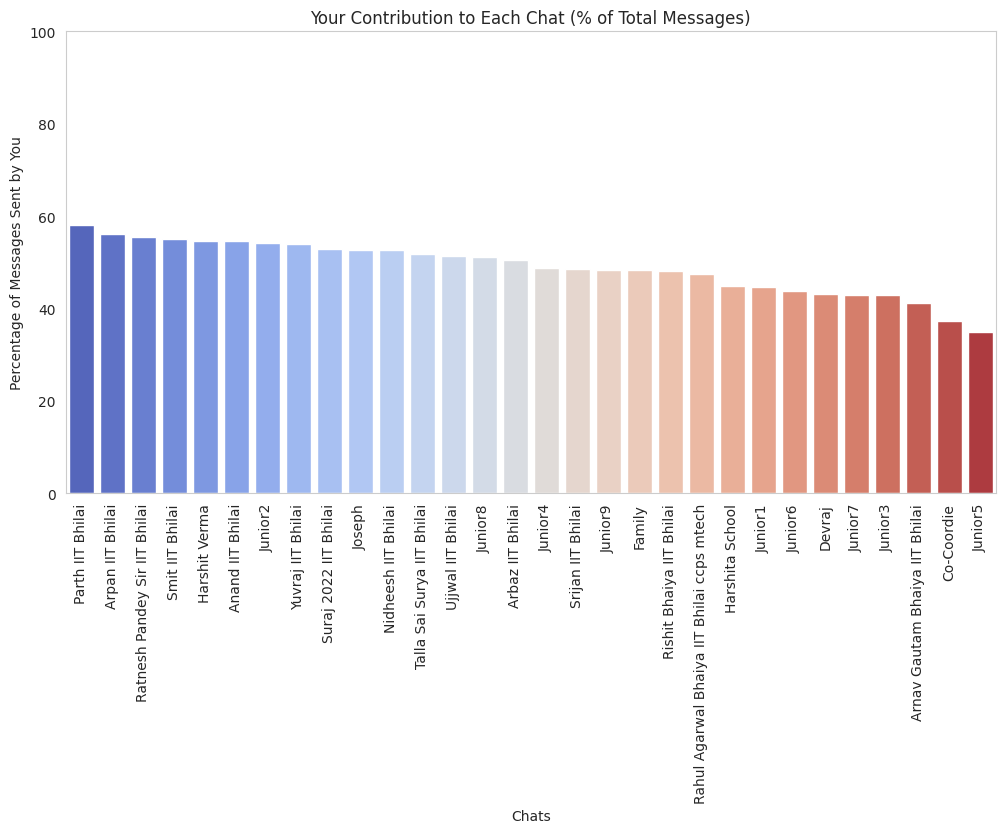

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x=chat_stats['Chat'], y=chat_stats['Percentage_Sent_By_You'], palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Chats')
plt.ylabel('Percentage of Messages Sent by You')
plt.title('Your Contribution to Each Chat (% of Total Messages)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


In [12]:
Friends = ['Arpan IIT Bhilai','Joseph', 'Talla Sai Surya IIT Bhilai', 'Ujjwal IIT Bhilai', 'Arbaz IIT Bhilai', 'Srijan IIT Bhilai', 'Family', '+91 82502 13794', 'Devraj', 'Harshit Verma', 'Smit IIT Bhilai', 'Yuvraj IIT Bhilai']

df_friends = df[df.Chat.isin(Friends)]
df_Work = df[~df.Chat.isin(Friends)]
Juniors = ['Junior1', 'Junior2', 'Junior3', 'Junior4', 'Junior5', 'Junior6', 'Junior7', 'Junior8']
df_Juniors = df[df.Chat.isin(Juniors)]
df_Work = df_Work[~df_Work.Chat.isin(Juniors)]
df_friends
df_friends

Chat        Date   Time  Sender                     Message  \
0      Devraj  01/07/2021  17:15  Devraj             <Media omitted>   
1      Devraj  01/07/2021  17:16  Devraj             <Media omitted>   
2      Devraj  02/07/2021  09:39  Devraj           Missed voice call   
3      Devraj  02/07/2021  09:47  Devraj             <Media omitted>   
4      Devraj  02/07/2021  09:53  Devraj           Missed voice call   
...       ...         ...    ...     ...                         ...   
97893  Joseph  08/02/2025  00:59   Koosh                        null   
97894  Joseph  08/02/2025  01:00   Koosh             <Media omitted>   
97895  Joseph  08/02/2025  01:01  Joseph             <Media omitted>   
97896  Joseph  08/02/2025  14:15  Joseph                        null   
97897  Joseph  09/02/2025  23:37   Koosh  bhai kya choke maara hai 🥲   

                 Datetime  Hour         Day   Weekday  Month  Year Month_Name  
0     2021-07-01 17:15:00    17  2021-07-01  Thursday      7  2021       July  
1     2021-07-01 17:16:00    17  2021-07-01  Thursday      7  2021       July  
2     2021-07-02 09:39:00     9  2021-07-02    Friday      7  2021       July  
3     2021-07-02 09:47:00     9  2021-07-02    Friday      7  2021       July  
4     2021-07-02 09:53:00     9  2021-07-02    Friday      7  2021       July  
...                   ...   ...         ...       ...    ...   ...        ...  
97893 2025-02-08 00:59:00     0  2025-02-08  Saturday      2  2025   February  
97894 2025-02-08 01:00:00     1  2025-02-08  Saturday      2  2025   February  
97895 2025-02-08 01:01:00     1  2025-02-08  Saturday      2  2025   February  
97896 2025-02-08 14:15:00    14  2025-02-08  Saturday      2  2025   February  
97897 2025-02-09 23:37:00    23  2025-02-09    Sunday      2  2025   February  

[62615 rows x 12 columns]

In [13]:
# prompt: In new_df, create 3 new cols junior work friend and assign 1 or 0 based on df_work, df_friends, df_junior

# Assuming df, df_friends, df_work, and df_juniors are already defined as in the provided code.

# Create new columns in new_df and initialize them to 0
new_df['junior'] = 0
new_df['work'] = 0
new_df['friend'] = 0

# Iterate through the rows of new_df
for index, row in new_df.iterrows():
    chat_name = row['Chat']

    # Check if the chat name exists in the corresponding DataFrames
    if chat_name in df_Juniors['Chat'].values:
        new_df.loc[index, 'junior'] = 1
    if chat_name in df_Work['Chat'].values:
        new_df.loc[index, 'work'] = 1
    if chat_name in df_friends['Chat'].values:
        new_df.loc[index, 'friend'] = 1

# Display the updated new_df
new_df


Chat  Total_Messages  Your_Messages  \
0                             Anand IIT Bhilai             414            226   
1                             Arbaz IIT Bhilai            1966            994   
2               Arnav Gautam Bhaiya IIT Bhilai             620            256   
3                             Arpan IIT Bhilai            8840           4964   
4                                   Co-Coordie           25266           9446   
5                                       Devraj            3945           1701   
6                                       Family           10819           5223   
7                                Harshit Verma             994            544   
8                              Harshita School            5084           2279   
9                                       Joseph            6940           3660   
10                                     Junior1             383            171   
11                                     Junior2             481            261   
12                                     Junior3             112             48   
13                                     Junior4             211            103   
14                                     Junior5             281             98   
15                                     Junior6             260            114   
16                                     Junior7             175             75   
17                                     Junior8             129             66   
18                                     Junior9             207            100   
19                         Nidheesh IIT Bhilai             152             80   
20                            Parth IIT Bhilai            1207            702   
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech             565            268   
22               Ratnesh Pandey Sir IIT Bhilai             229            127   
23                    Rishit Bhaiya IIT Bhilai             491            236   
24                             Smit IIT Bhilai            3355           1849   
25                           Srijan IIT Bhilai            3380           1641   
26                       Suraj 2022 IIT Bhilai             663            351   
27                  Talla Sai Surya IIT Bhilai            7547           3920   
28                           Ujjwal IIT Bhilai           13465           6911   
29                           Yuvraj IIT Bhilai            1364            738   

    Percentage_Sent_By_You  junior  work  friend  
0                54.589372       0     1       0  
1                50.559512       0     0       1  
2                41.290323       0     1       0  
3                56.153846       0     0       1  
4                37.386211       0     1       0  
5                43.117871       0     0       1  
6                48.276181       0     0       1  
7                54.728370       0     0       1  
8                44.826908       0     1       0  
9                52.737752       0     0       1  
10               44.647520       1     0       0  
11               54.261954       1     0       0  
12               42.857143       1     0       0  
13               48.815166       1     0       0  
14               34.875445       1     0       0  
15               43.846154       1     0       0  
16               42.857143       1     0       0  
17               51.162791       1     0       0  
18               48.309179       1     0       0  
19               52.631579       0     1       0  
20               58.160729       0     1       0  
21               47.433628       0     1       0  
22               55.458515       0     1       0  
23               48.065173       0     1       0  
24               55.111773       0     0       1  
25               48.550296       0     0       1  
26               52.941176       0     1       0  
27               51.941169       0     0       1  
28               51.325659       0     0       1  


<ipython-input-14-b25f3bdbc028>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages, y=categories, palette='mako')  # A gradient palette for a modern look


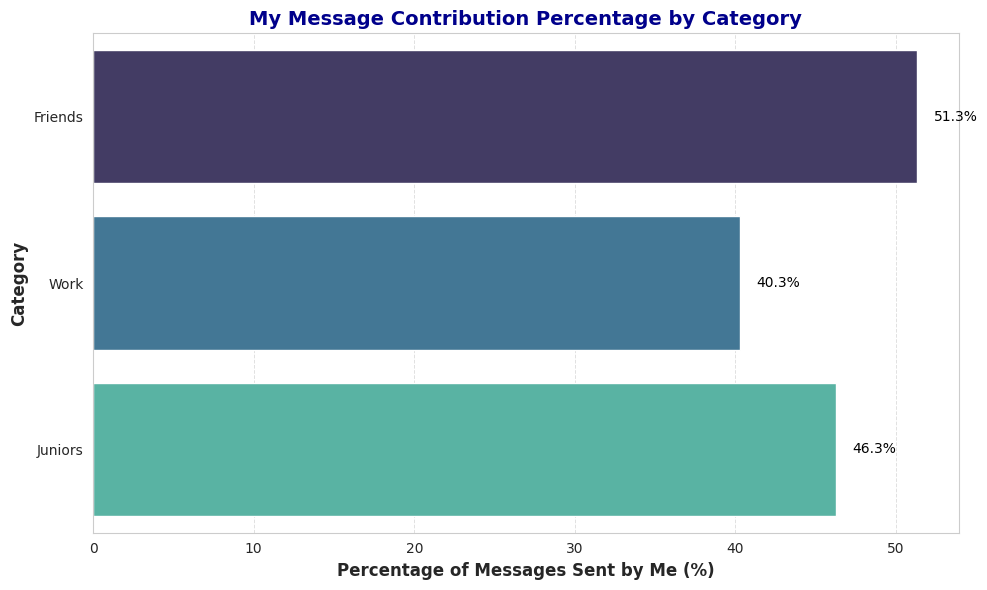

In [14]:
# prompt: compare between sberage % messages sent by Koosh in work, friend, junior ,

import matplotlib.pyplot as plt

# Assuming df_friends, df_Work, and df_Juniors are already defined as in your provided code

# Calculate message percentages for each group
total_messages_friends = len(df_friends)
koosh_messages_friends = len(df_friends[df_friends['Sender'] == 'Koosh'])
percentage_friends = (koosh_messages_friends / total_messages_friends) * 100 if total_messages_friends > 0 else 0

total_messages_work = len(df_Work)
koosh_messages_work = len(df_Work[df_Work['Sender'] == 'Koosh'])
percentage_work = (koosh_messages_work / total_messages_work) * 100 if total_messages_work > 0 else 0

total_messages_juniors = len(df_Juniors)
koosh_messages_juniors = len(df_Juniors[df_Juniors['Sender'] == 'Koosh'])
percentage_juniors = (koosh_messages_juniors / total_messages_juniors) * 100 if total_messages_juniors > 0 else 0


import matplotlib.pyplot as plt
import seaborn as sns

# Data
categories = ['Friends', 'Work', 'Juniors']
percentages = [percentage_friends, percentage_work, percentage_juniors]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=percentages, y=categories, palette='mako')  # A gradient palette for a modern look

# Annotate each bar with the percentage value
for i, v in enumerate(percentages):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', ha='left', fontsize=10, color='black')

# Labels and formatting
plt.xlabel('Percentage of Messages Sent by Me (%)', fontsize=12, fontweight='bold')
plt.ylabel('Category', fontsize=12, fontweight='bold')
plt.title('My Message Contribution Percentage by Category', fontsize=14, fontweight='bold', color='darkblue')

# Soft grid lines
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

# Tight layout to prevent cutoff
plt.tight_layout()
plt.show()



Contribution with friends = 51.33753892837179
Contribution with work = 40.27269320573059


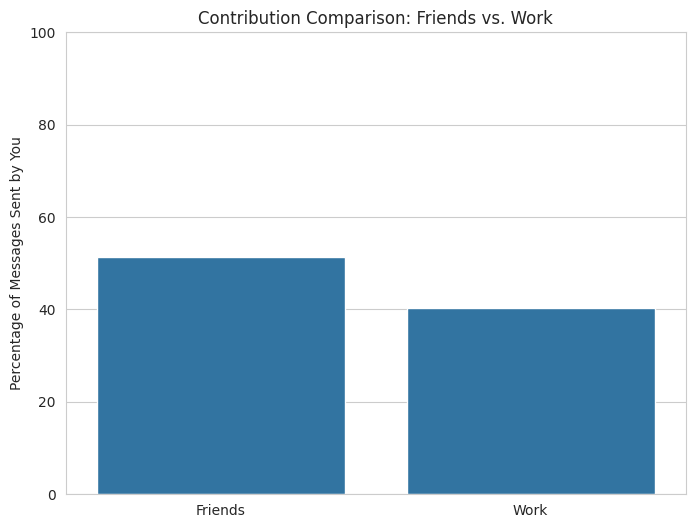

In [15]:


import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total messages in df_friends and df_work
total_friends_messages = len(df_friends)
total_work_messages = len(df_Work)

# Calculate your messages in df_friends and df_work
your_friends_messages = len(df_friends[df_friends['Sender'] == "Koosh"])
your_work_messages = len(df_Work[df_Work['Sender'] == "Koosh"])

# Calculate contribution percentages
friends_contribution = (your_friends_messages / total_friends_messages) * 100 if total_friends_messages > 0 else 0
work_contribution = (your_work_messages / total_work_messages) * 100 if total_work_messages > 0 else 0
print(f"Contribution with friends = {friends_contribution}")
print(f"Contribution with work = {work_contribution}")


# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Friends', 'Work'], y=[friends_contribution, work_contribution])
plt.ylabel('Percentage of Messages Sent by You')
plt.title('Contribution Comparison: Friends vs. Work')
plt.ylim(0, 100)  # Set y-axis limit
plt.show()





<ipython-input-16-c2293ee2db2d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chat', y='Average_Length', data=average_message_lengths, palette='viridis', edgecolor='black')


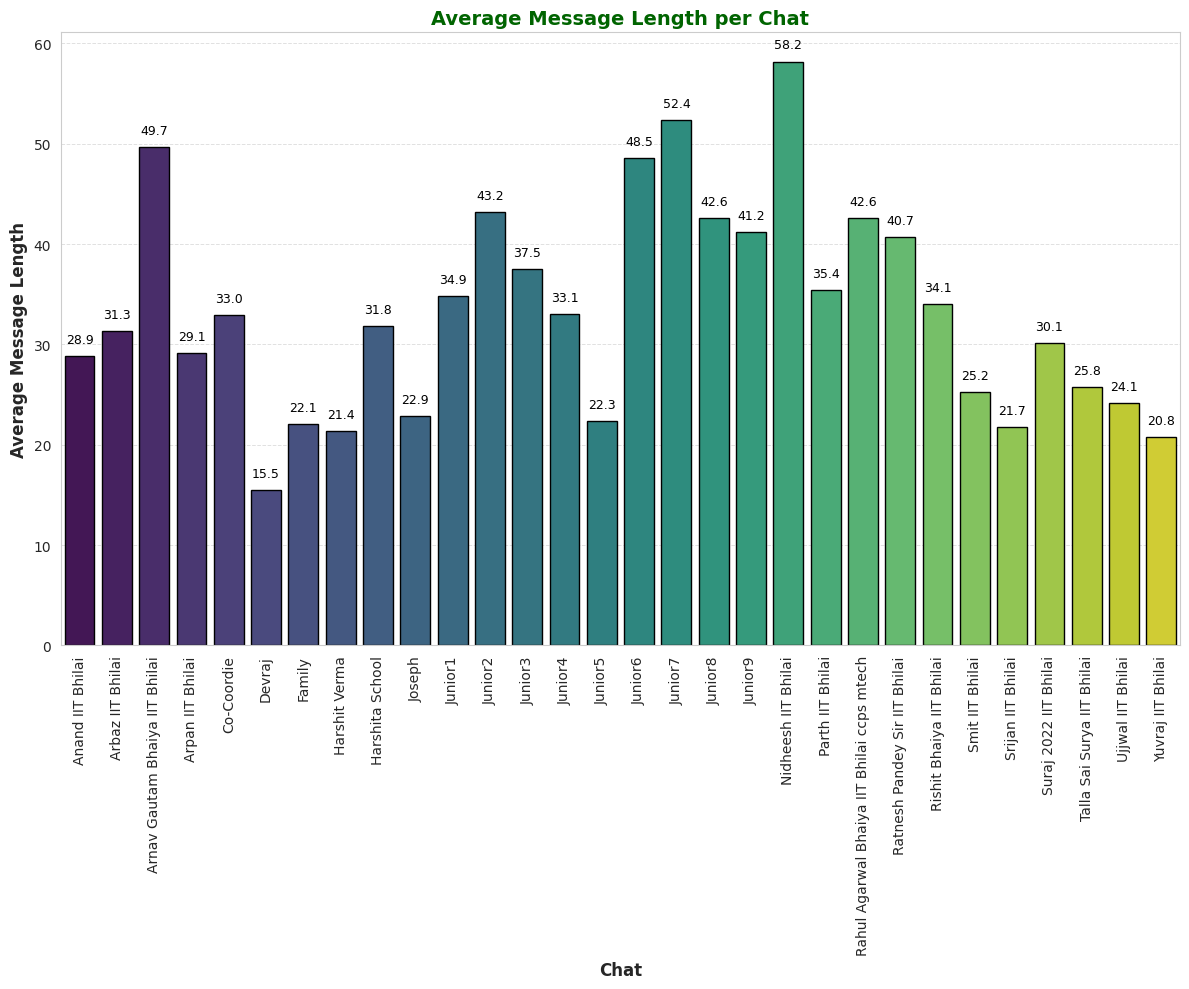

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average message length per chat
average_message_lengths = df.groupby('Chat')['Message'].apply(lambda x: x.str.len().mean()).reset_index(name='Average_Length')

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Chat', y='Average_Length', data=average_message_lengths, palette='viridis', edgecolor='black')

# Add value annotations
for i, row in average_message_lengths.iterrows():
    plt.text(i, row['Average_Length'] + 1, f"{row['Average_Length']:.1f}", ha='center', va='bottom', fontsize=9, color='black')

# Formatting
plt.xticks(rotation=90)
plt.xlabel('Chat', fontsize=12, fontweight='bold')
plt.ylabel('Average Message Length', fontsize=12, fontweight='bold')
plt.title('Average Message Length per Chat', fontsize=14, fontweight='bold', color='darkgreen')

# Add a soft grid for readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Ensure everything fits
plt.tight_layout()
plt.show()


In [17]:
# prompt: IN NEW_DF INCLUDE length per chat, it should match done above

# Assuming 'chat_stats' DataFrame from the previous code is available

# Calculate average message length per chat
average_message_lengths = df.groupby('Chat')['Message'].apply(lambda x: x.str.len().mean()).reset_index(name='Average_Length')

# Merge average message length into the new_df
new_df = pd.merge(new_df, average_message_lengths, on='Chat', how='left')

new_df = new_df
# Display the updated DataFrame
new_df


Chat  Total_Messages  Your_Messages  \
0                             Anand IIT Bhilai             414            226   
1                             Arbaz IIT Bhilai            1966            994   
2               Arnav Gautam Bhaiya IIT Bhilai             620            256   
3                             Arpan IIT Bhilai            8840           4964   
4                                   Co-Coordie           25266           9446   
5                                       Devraj            3945           1701   
6                                       Family           10819           5223   
7                                Harshit Verma             994            544   
8                              Harshita School            5084           2279   
9                                       Joseph            6940           3660   
10                                     Junior1             383            171   
11                                     Junior2             481            261   
12                                     Junior3             112             48   
13                                     Junior4             211            103   
14                                     Junior5             281             98   
15                                     Junior6             260            114   
16                                     Junior7             175             75   
17                                     Junior8             129             66   
18                                     Junior9             207            100   
19                         Nidheesh IIT Bhilai             152             80   
20                            Parth IIT Bhilai            1207            702   
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech             565            268   
22               Ratnesh Pandey Sir IIT Bhilai             229            127   
23                    Rishit Bhaiya IIT Bhilai             491            236   
24                             Smit IIT Bhilai            3355           1849   
25                           Srijan IIT Bhilai            3380           1641   
26                       Suraj 2022 IIT Bhilai             663            351   
27                  Talla Sai Surya IIT Bhilai            7547           3920   
28                           Ujjwal IIT Bhilai           13465           6911   
29                           Yuvraj IIT Bhilai            1364            738   

    Percentage_Sent_By_You  junior  work  friend  Average_Length  
0                54.589372       0     1       0       28.876812  
1                50.559512       0     0       1       31.319939  
2                41.290323       0     1       0       49.664516  
3                56.153846       0     0       1       29.134502  
4                37.386211       0     1       0       32.967308  
5                43.117871       0     0       1       15.451204  
6                48.276181       0     0       1       22.050652  
7                54.728370       0     0       1       21.408451  
8                44.826908       0     1       0       31.825531  
9                52.737752       0     0       1       22.871182  
10               44.647520       1     0       0       34.874674  
11               54.261954       1     0       0       43.222453  
12               42.857143       1     0       0       37.508929  
13               48.815166       1     0       0       33.061611  
14               34.875445       1     0       0       22.338078  
15               43.846154       1     0       0       48.542308  
16               42.857143       1     0       0       52.405714  
17               51.162791       1     0       0       42.573643  
18               48.309179       1     0       0       41.241546  
19               52.631579       0     1       0       58.197368  
20               58.160729       0     1       0       35.427506  
21               47.433628       0     1       0       4

Average message length with friend : 24.02622374830312
Average message length with work : 33.414833818569655


<ipython-input-18-ebe0ea5b6b9a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lengths, y=categories, palette='crest', edgecolor='black')


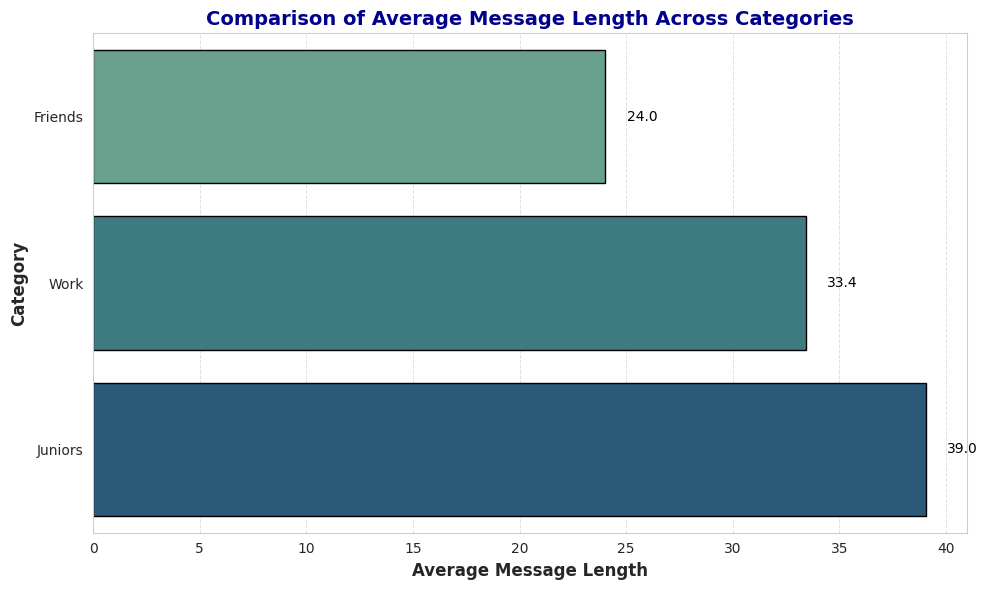

In [18]:


avg_friend_msg_len = df_friends['Message'].str.len().mean()
avg_work_msg_len = df_Work['Message'].str.len().mean()
avg_junior_msg_len = df_Juniors['Message'].str.len().mean()
print(f"Average message length with friend : {avg_friend_msg_len}")
print(f"Average message length with work : {avg_work_msg_len}")


import matplotlib.pyplot as plt
import seaborn as sns

# Data
categories = ['Friends', 'Work', 'Juniors']
avg_lengths = [avg_friend_msg_len, avg_work_msg_len, avg_junior_msg_len]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_lengths, y=categories, palette='crest', edgecolor='black')

# Annotate each bar with the average message length
for i, v in enumerate(avg_lengths):
    plt.text(v + 1, i, f"{v:.1f}", va='center', ha='left', fontsize=10, color='black')

# Formatting
plt.xlabel('Average Message Length', fontsize=12, fontweight='bold')
plt.ylabel('Category', fontsize=12, fontweight='bold')
plt.title('Comparison of Average Message Length Across Categories', fontsize=14, fontweight='bold', color='darkblue')

# Soft grid for better readability
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

# Ensure no label cutoff
plt.tight_layout()
plt.show()



In [19]:
!pip install collections nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud(text) :



# Display the Word Cloud
 plt.figure(figsize=(10, 5))
 plt.imshow(text, interpolation="bilinear")
 plt.axis("off")
 plt.show()


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [20]:

df = df[~df['Message'].str.contains('Media omitted', na=False)]
df = df[~df['Message'].str.contains('deleted', na=False)]
df = df[~df['Message'].str.contains('voice', na=False)]
df = df[~df['Message'].str.contains('bc', na=False)]
df = df[~df['Message'].str.contains('mc', na=False)]
df = df[~df['Message'].str.contains('bsdk', na=False)]
df = df[~df['Message'].str.contains('lode', na=False)]
df = df[~df['Message'].str.contains('dreams', na=False)]
df = df[~df['Message'].str.contains('sweet', na=False)]
df = df[~df['Message'].str.contains('null', na=False)]


df_friends = df_friends[~df_friends['Message'].str.contains('Media omitted', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('deleted', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('voice', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('bc', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('Bc', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('mc', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('Mc', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('bsdk', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('lode', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('dreams', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('sweet', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('bakchodi', na=False)]
df_friends = df_friends[~df_friends['Message'].str.contains('null', na=False)]


df_Work = df_Work[~df_Work['Message'].str.contains('Media omitted', na=False)]
df_Work = df_Work[~df_Work['Message'].str.contains('deleted', na=False)]
df_Work = df_Work[~df_Work['Message'].str.contains('voice', na=False)]


df_Juniors = df_Juniors[~df_Juniors['Message'].str.contains('Media omitted', na=False)]
df_Juniors = df_Juniors[~df_Juniors['Message'].str.contains('deleted', na=False)]
df_Juniors = df_Juniors[~df_Juniors['Message'].str.contains('voice', na=False)]
df_Juniors = df_Juniors[~df_Juniors['Message'].str.contains('null', na=False)]


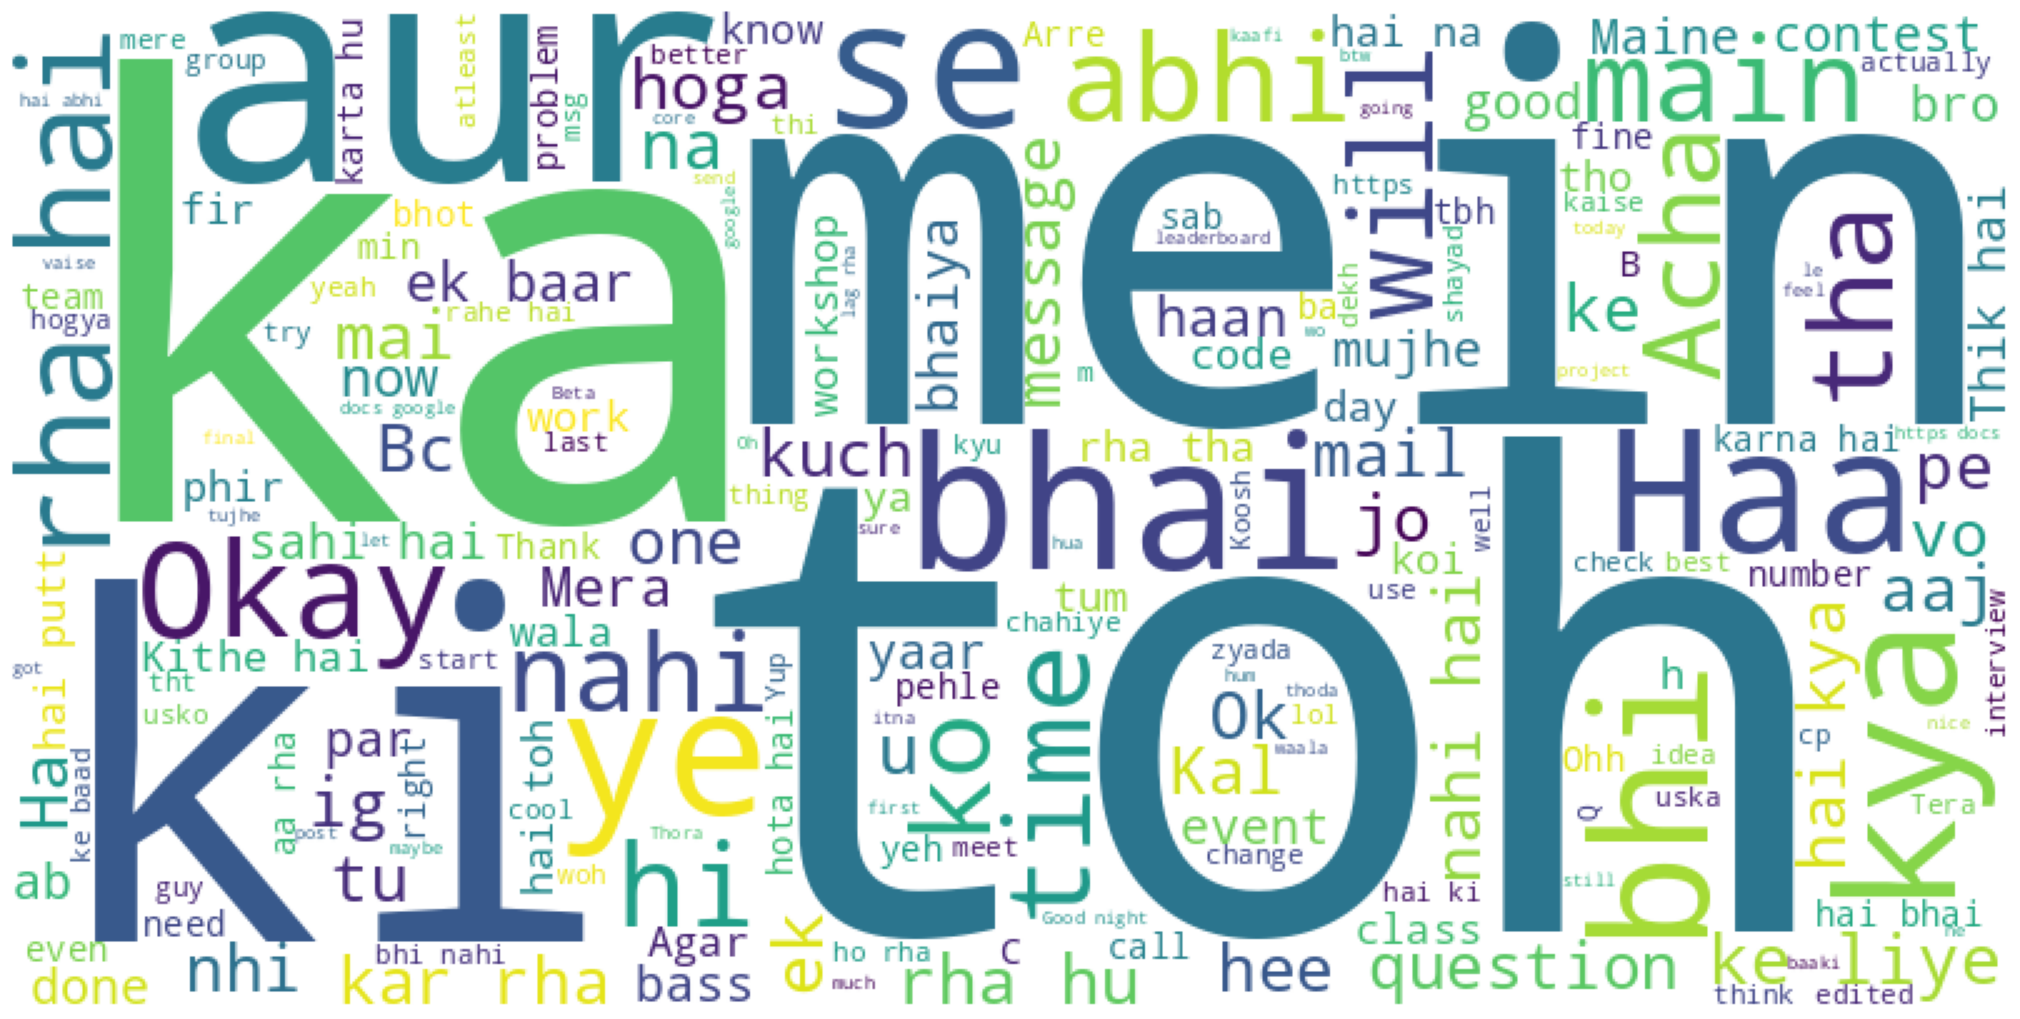

In [21]:
# prompt: df['Message'] do word_cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud


text = " ".join(df['Message'].astype(str))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


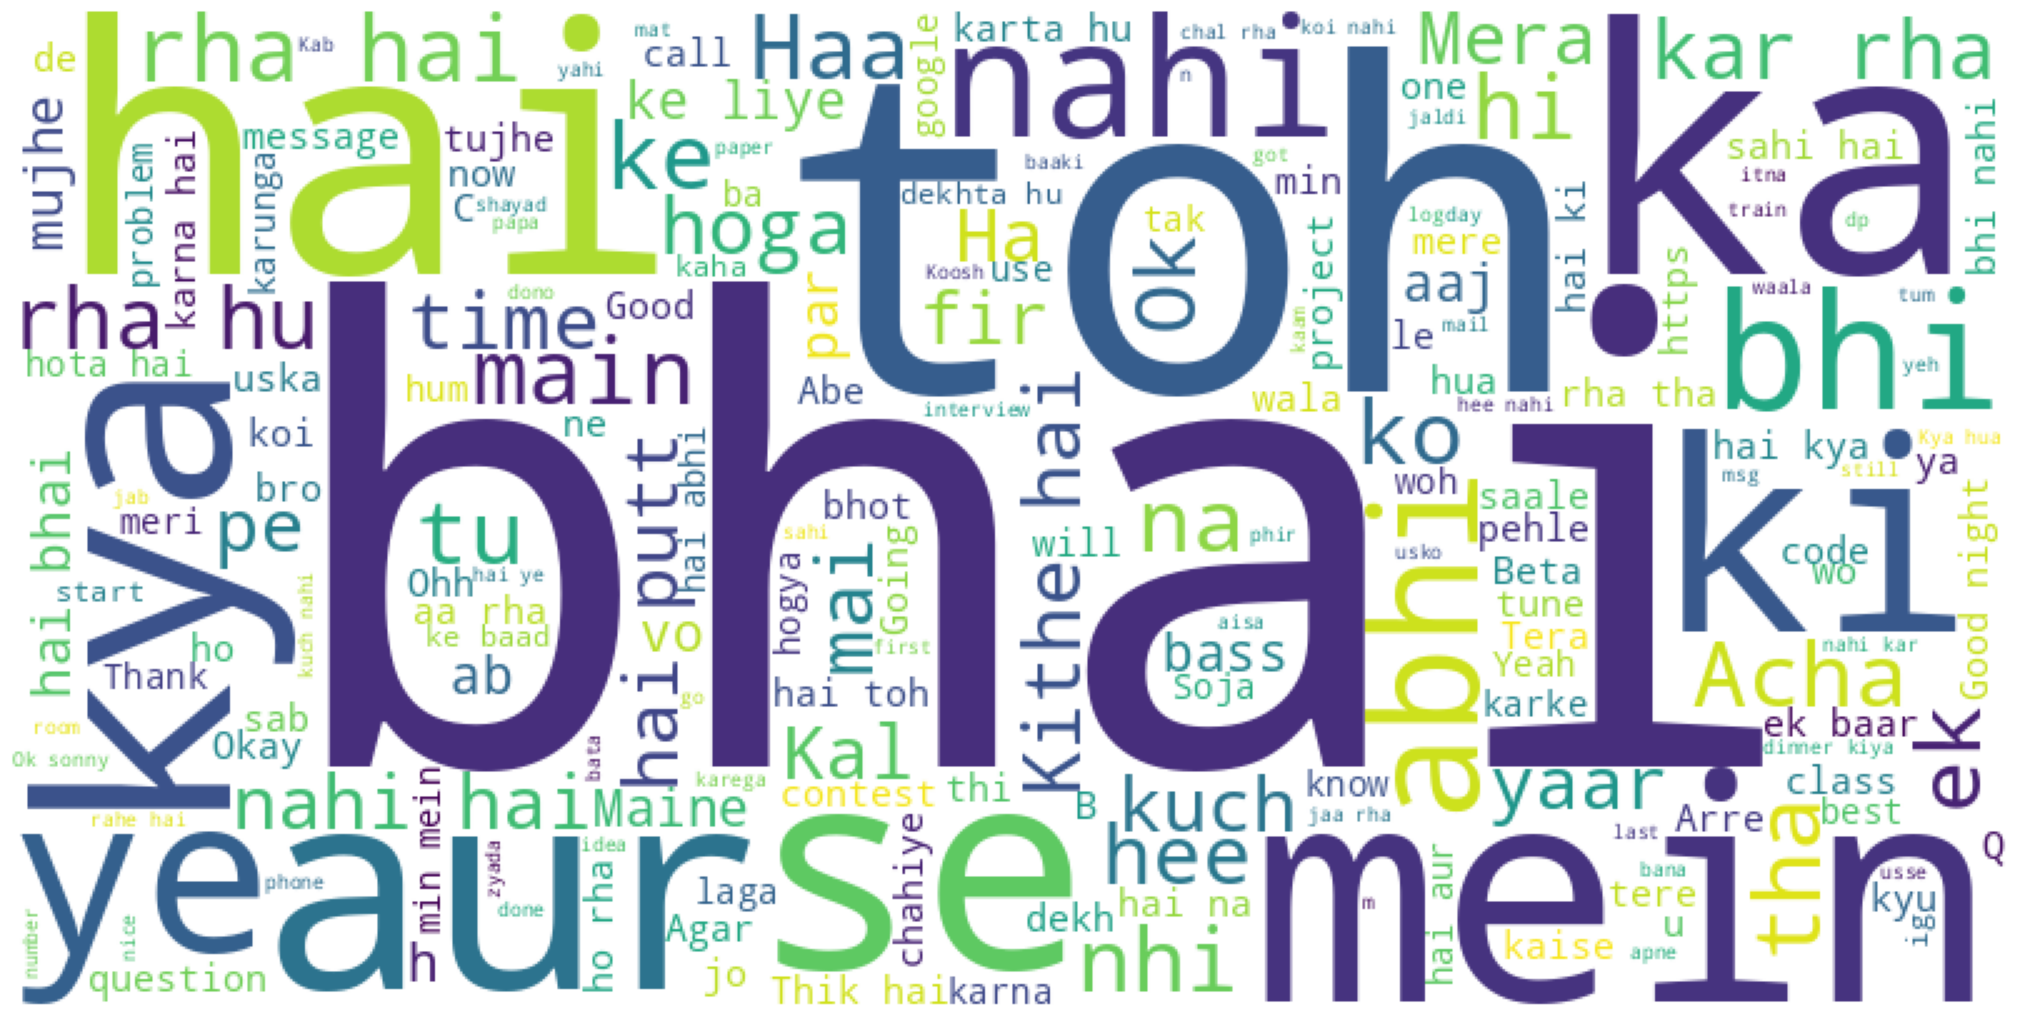

In [22]:
text = " ".join(df_friends['Message'].astype(str))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


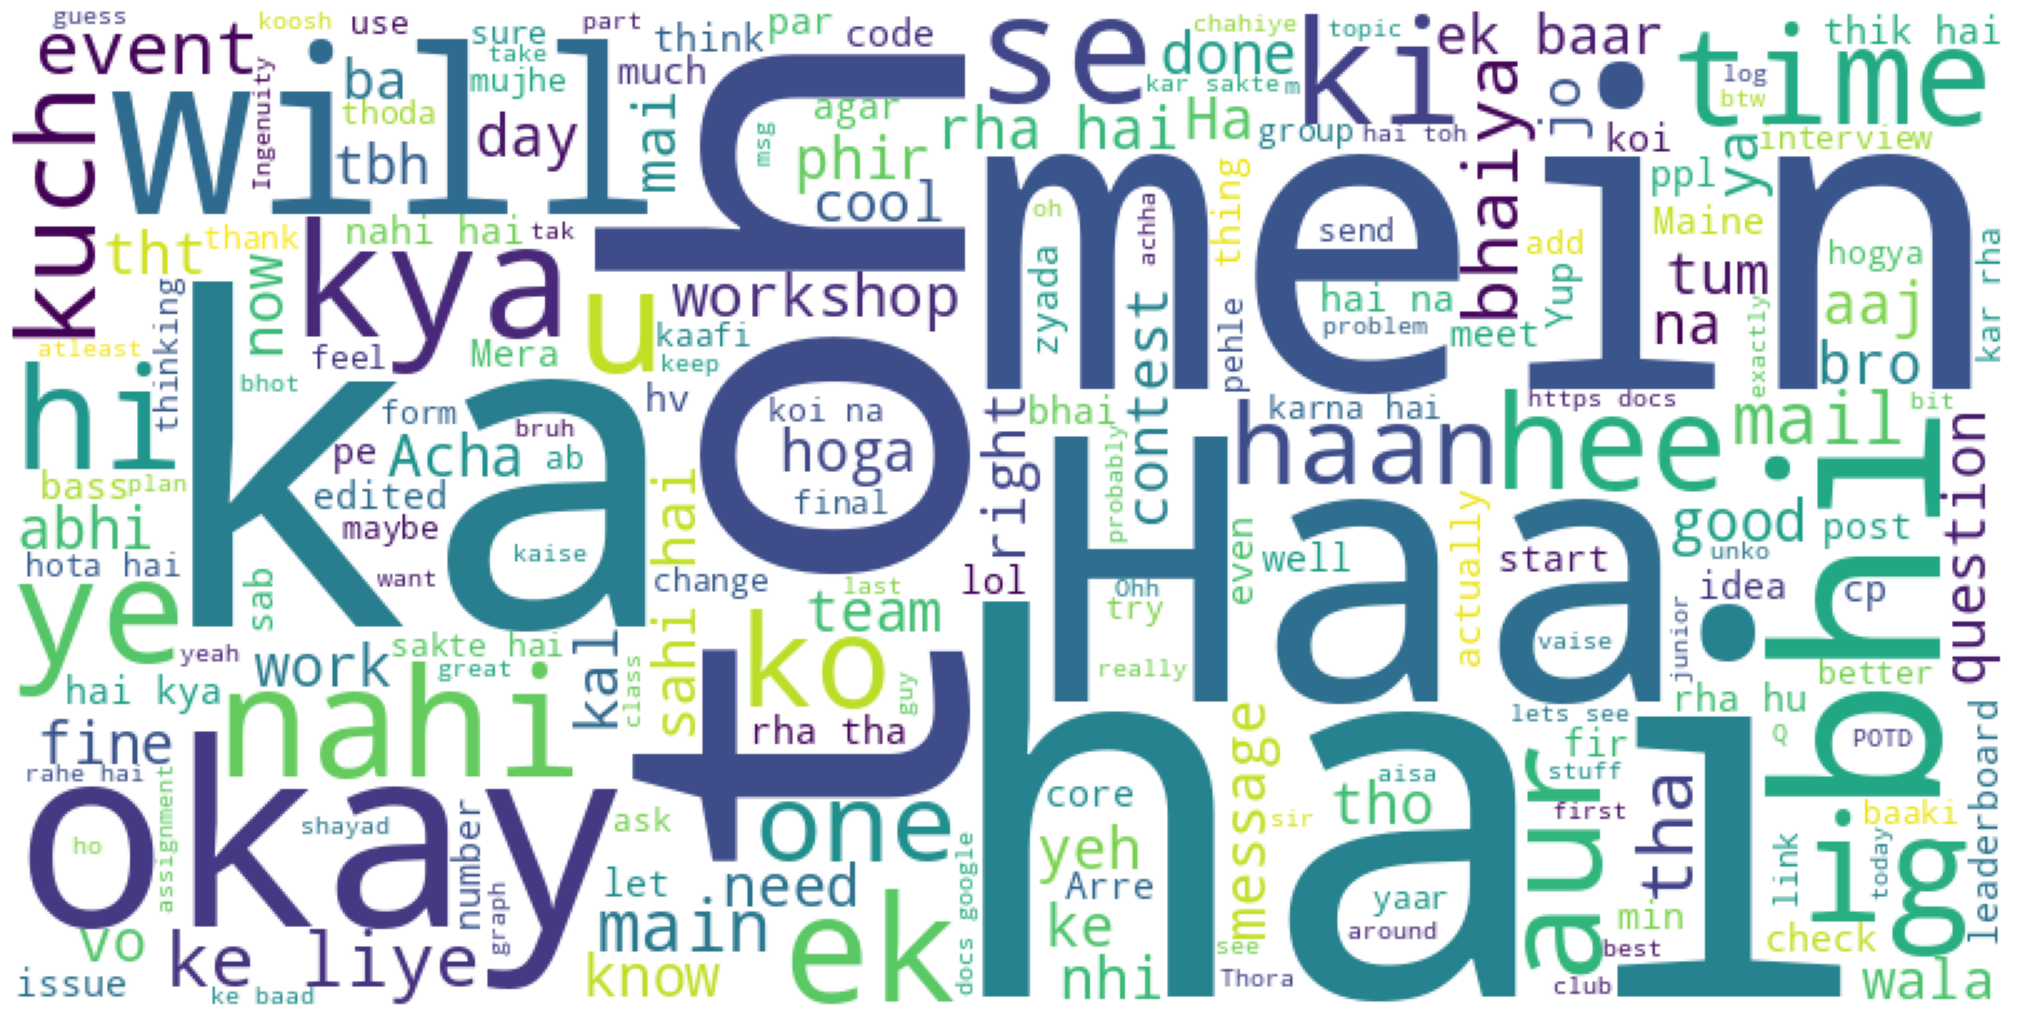

In [23]:
text = " ".join(df_Work['Message'].astype(str))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


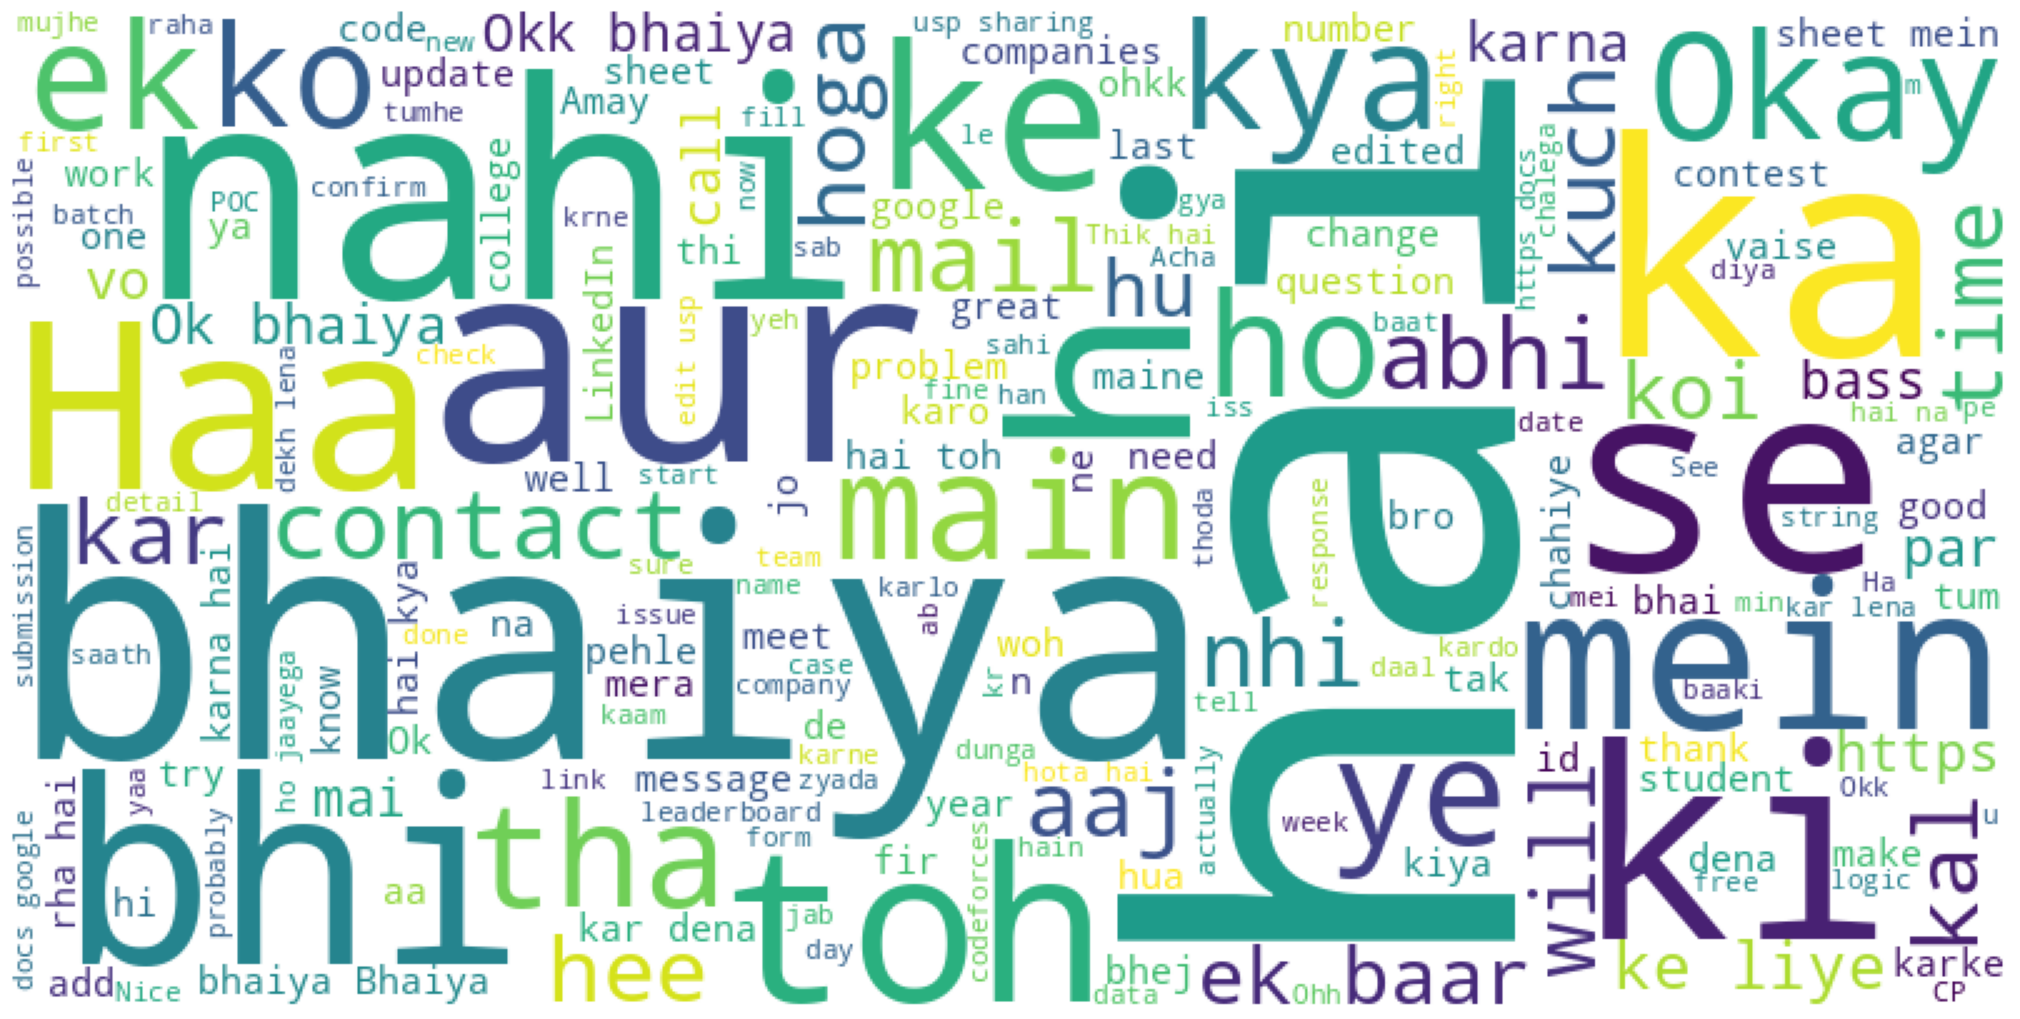

In [24]:
text = " ".join(df_Juniors['Message'].astype(str))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [25]:
df_Work.Chat.unique()

array(['Co-Coordie', 'Anand IIT Bhilai', 'Suraj 2022 IIT Bhilai',
       'Rishit Bhaiya IIT Bhilai', 'Nidheesh IIT Bhilai',
       'Rahul Agarwal Bhaiya IIT Bhilai ccps mtech', 'Harshita School',
       'Arnav Gautam Bhaiya IIT Bhilai', 'Parth IIT Bhilai',
       'Ratnesh Pandey Sir IIT Bhilai'], dtype=object)

In [26]:
# prompt: count number of  words in message of df without using nltk

def count_words(message):
  """Counts the number of words in a message without using NLTK.

  Args:
    message: The message string.

  Returns:
    The number of words in the message.
  """
  if not isinstance(message, str):
    return 0  # Handle non-string inputs

  words = message.split()
  return len(words)

# Apply the function to the 'Message' column and create a new column 'Word_Count'
df['Word_Count'] = df['Message'].apply(count_words)
df['Word_Count'].sum()


506941

                                          Chat  Average_Messages_per_Day
0                             Anand IIT Bhilai                  8.738095
1                             Arbaz IIT Bhilai                 24.220779
2               Arnav Gautam Bhaiya IIT Bhilai                 11.211538
3                             Arpan IIT Bhilai                 34.464602
4                                   Co-Coordie                 97.892430
5                                       Devraj                 10.303448
6                                       Family                 15.376860
7                                Harshit Verma                  4.918699
8                              Harshita School                 23.655502
9                                       Joseph                 12.964455
10                                     Junior1                  7.510204
11                                     Junior2                  9.444444
12                                     Junior3     

<ipython-input-27-b713564fef81>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


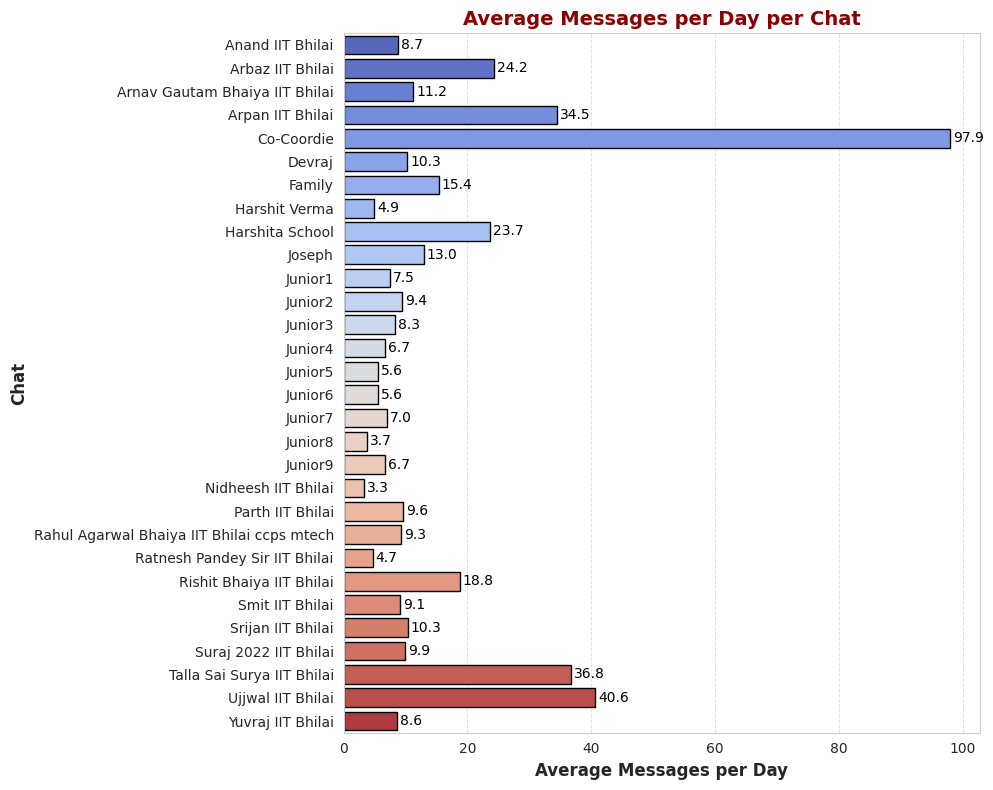

In [27]:

# Calculate the average messages sent per day for each chat
messages_per_day = df.groupby(['Chat', 'Day']).size().reset_index(name='Message_Count')
average_messages_per_day = messages_per_day.groupby('Chat')['Message_Count'].mean().reset_index(name='Average_Messages_per_Day')

# Display the result
print(average_messages_per_day)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Average_Messages_per_Day',
    y='Chat',
    data=average_messages_per_day,
    palette='coolwarm',  # Updated color palette for contrast
    edgecolor='black'  # Bar edges for definition
)

# Annotate each bar with the average value
for i, row in average_messages_per_day.iterrows():
    plt.text(row['Average_Messages_per_Day'] + 0.5, i, f"{row['Average_Messages_per_Day']:.1f}", va='center', ha='left', fontsize=10, color='black')

# Label and formatting
plt.xlabel('Average Messages per Day', fontsize=12, fontweight='bold')
plt.ylabel('Chat', fontsize=12, fontweight='bold')
plt.title('Average Messages per Day per Chat', fontsize=14, fontweight='bold', color='darkred')

# Soft grid for readability
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

# Ensure tight layout for no cutoff
plt.tight_layout()
plt.show()



In [28]:
# prompt: new_df include avg msgs per day

# Merge average messages per day into the new_df
new_df = pd.merge(new_df, average_messages_per_day, on='Chat', how='left')

# Display the updated DataFrame
new_df


Chat  Total_Messages  Your_Messages  \
0                             Anand IIT Bhilai             414            226   
1                             Arbaz IIT Bhilai            1966            994   
2               Arnav Gautam Bhaiya IIT Bhilai             620            256   
3                             Arpan IIT Bhilai            8840           4964   
4                                   Co-Coordie           25266           9446   
5                                       Devraj            3945           1701   
6                                       Family           10819           5223   
7                                Harshit Verma             994            544   
8                              Harshita School            5084           2279   
9                                       Joseph            6940           3660   
10                                     Junior1             383            171   
11                                     Junior2             481            261   
12                                     Junior3             112             48   
13                                     Junior4             211            103   
14                                     Junior5             281             98   
15                                     Junior6             260            114   
16                                     Junior7             175             75   
17                                     Junior8             129             66   
18                                     Junior9             207            100   
19                         Nidheesh IIT Bhilai             152             80   
20                            Parth IIT Bhilai            1207            702   
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech             565            268   
22               Ratnesh Pandey Sir IIT Bhilai             229            127   
23                    Rishit Bhaiya IIT Bhilai             491            236   
24                             Smit IIT Bhilai            3355           1849   
25                           Srijan IIT Bhilai            3380           1641   
26                       Suraj 2022 IIT Bhilai             663            351   
27                  Talla Sai Surya IIT Bhilai            7547           3920   
28                           Ujjwal IIT Bhilai           13465           6911   
29                           Yuvraj IIT Bhilai            1364            738   

    Percentage_Sent_By_You  junior  work  friend  Average_Length  \
0                54.589372       0     1       0       28.876812   
1                50.559512       0     0       1       31.319939   
2                41.290323       0     1       0       49.664516   
3                56.153846       0     0       1       29.134502   
4                37.386211       0     1       0       32.967308   
5                43.117871       0     0       1       15.451204   
6                48.276181       0     0       1       22.050652   
7                54.728370       0     0       1       21.408451   
8                44.826908       0     1       0       31.825531   
9                52.737752       0     0       1       22.871182   
10               44.647520       1     0       0       34.874674   
11               54.261954       1     0       0       43.222453   
12               42.857143       1     0       0       37.508929   
13               48.815166       1     0       0       33.061611   
14               34.875445       1     0       0       22.338078   
15               43.846154       1     0       0       48.542308   
16               42.857143       1     0       0       52.405714   
17               51.162791       1     0       0       42.573643   
18               48.309179       1     0       0       41.241546   
19               52.631579       0     1       0       58.197368   
20               58.160729       0     1       0       35.427506   
21               47.433628       0

<ipython-input-29-067134729513>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=avg_messages, palette='coolwarm', edgecolor='black')


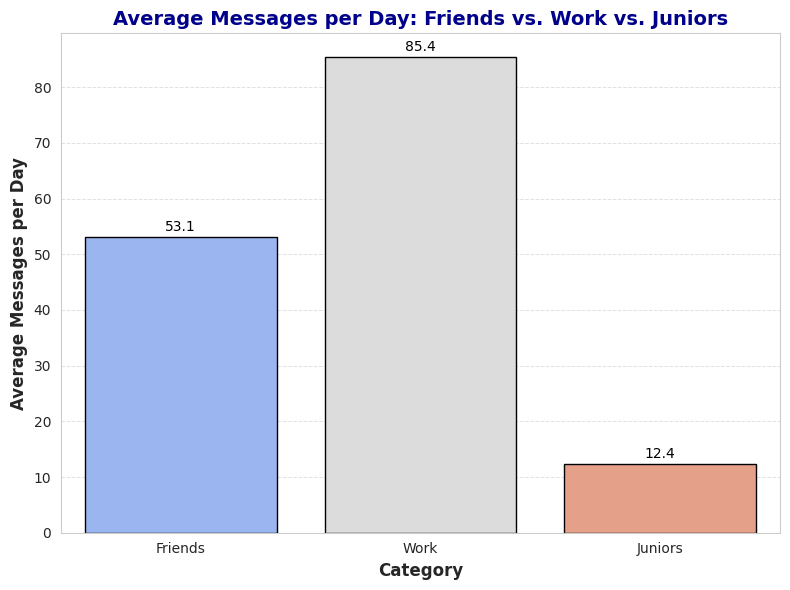

In [29]:
# prompt: compare avg message per day for work, friends and juniors

# Calculate average messages per day for each category
avg_messages_friends = df_friends.groupby('Day').size().mean()
avg_messages_work = df_Work.groupby('Day').size().mean()
avg_messages_juniors = df_Juniors.groupby('Day').size().mean()

# Create a bar plot
categories = ['Friends', 'Work', 'Juniors']
avg_messages = [avg_messages_friends, avg_messages_work, avg_messages_juniors]

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=avg_messages, palette='coolwarm', edgecolor='black')

# Annotate each bar with the average message count
for i, v in enumerate(avg_messages):
    plt.text(i, v + 0.5, f"{v:.1f}", ha='center', va='bottom', fontsize=10, color='black')

# Labeling and formatting
plt.ylabel('Average Messages per Day', fontsize=12, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.title('Average Messages per Day: Friends vs. Work vs. Juniors', fontsize=14, fontweight='bold', color='darkblue')

# Add a soft grid for readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Ensure layout fits well
plt.tight_layout()
plt.show()


                                          Chat  Unique_Days
0                             Anand IIT Bhilai           42
1                             Arbaz IIT Bhilai           77
2               Arnav Gautam Bhaiya IIT Bhilai           52
3                             Arpan IIT Bhilai          226
4                                   Co-Coordie          251
5                                       Devraj          290
6                                       Family          605
7                                Harshit Verma          123
8                              Harshita School          209
9                                       Joseph          422
10                                     Junior1           49
11                                     Junior2           45
12                                     Junior3           13
13                                     Junior4           29
14                                     Junior5           38
15                                     J

<ipython-input-30-cc194ef85243>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


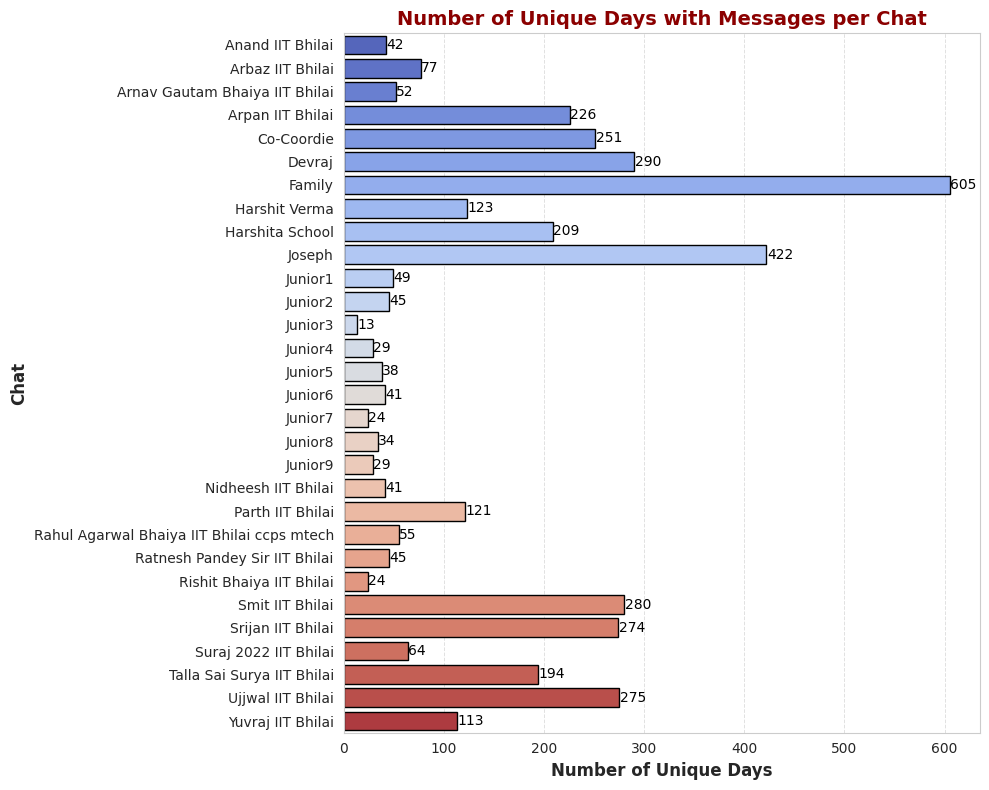

In [30]:


# Calculate the number of unique days for each chat
unique_days_per_chat = df.groupby('Chat')['Day'].nunique().reset_index(name='Unique_Days')

# Display the result
print(unique_days_per_chat)

import matplotlib.pyplot as plt
import seaborn as sns



# Plotting the number of unique days per chat
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Unique_Days',
    y='Chat',
    data=unique_days_per_chat,
    palette='coolwarm',  # Updated color palette for contrast
    edgecolor='black'  # Bar edges for definition
)

# Annotate each bar with the unique day count
for i, row in unique_days_per_chat.iterrows():
    plt.text(row['Unique_Days'] + 0.5, i, f"{row['Unique_Days']}", va='center', ha='left', fontsize=10, color='black')

# Labels and formatting
plt.xlabel('Number of Unique Days', fontsize=12, fontweight='bold')
plt.ylabel('Chat', fontsize=12, fontweight='bold')
plt.title('Number of Unique Days with Messages per Chat', fontsize=14, fontweight='bold', color='darkred')

# Soft grid for readability
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)

# Ensure no layout issues
plt.tight_layout()
plt.show()



In [31]:
new_df = pd.merge(new_df, unique_days_per_chat, on='Chat', how='left')

# Display the updated DataFrame
new_df

Chat  Total_Messages  Your_Messages  \
0                             Anand IIT Bhilai             414            226   
1                             Arbaz IIT Bhilai            1966            994   
2               Arnav Gautam Bhaiya IIT Bhilai             620            256   
3                             Arpan IIT Bhilai            8840           4964   
4                                   Co-Coordie           25266           9446   
5                                       Devraj            3945           1701   
6                                       Family           10819           5223   
7                                Harshit Verma             994            544   
8                              Harshita School            5084           2279   
9                                       Joseph            6940           3660   
10                                     Junior1             383            171   
11                                     Junior2             481            261   
12                                     Junior3             112             48   
13                                     Junior4             211            103   
14                                     Junior5             281             98   
15                                     Junior6             260            114   
16                                     Junior7             175             75   
17                                     Junior8             129             66   
18                                     Junior9             207            100   
19                         Nidheesh IIT Bhilai             152             80   
20                            Parth IIT Bhilai            1207            702   
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech             565            268   
22               Ratnesh Pandey Sir IIT Bhilai             229            127   
23                    Rishit Bhaiya IIT Bhilai             491            236   
24                             Smit IIT Bhilai            3355           1849   
25                           Srijan IIT Bhilai            3380           1641   
26                       Suraj 2022 IIT Bhilai             663            351   
27                  Talla Sai Surya IIT Bhilai            7547           3920   
28                           Ujjwal IIT Bhilai           13465           6911   
29                           Yuvraj IIT Bhilai            1364            738   

    Percentage_Sent_By_You  junior  work  friend  Average_Length  \
0                54.589372       0     1       0       28.876812   
1                50.559512       0     0       1       31.319939   
2                41.290323       0     1       0       49.664516   
3                56.153846       0     0       1       29.134502   
4                37.386211       0     1       0       32.967308   
5                43.117871       0     0       1       15.451204   
6                48.276181       0     0       1       22.050652   
7                54.728370       0     0       1       21.408451   
8                44.826908       0     1       0       31.825531   
9                52.737752       0     0       1       22.871182   
10               44.647520       1     0       0       34.874674   
11               54.261954       1     0       0       43.222453   
12               42.857143       1     0       0       37.508929   
13               48.815166       1     0       0       33.061611   
14               34.875445       1     0       0       22.338078   
15               43.846154       1     0       0       48.542308   
16               42.857143       1     0       0       52.405714   
17               51.162791       1     0       0       42.573643   
18               48.309179       1     0       0       41.241546   
19               52.631579       0     1       0       58.197368   
20               58.160729       0     1       0       35.427506   
21               47.433628       0

Unique days with friends: 972
Unique days with work: 396
Unique days with juniors: 164


<ipython-input-32-aeaa6188681a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=unique_days, palette='viridis', edgecolor='black')


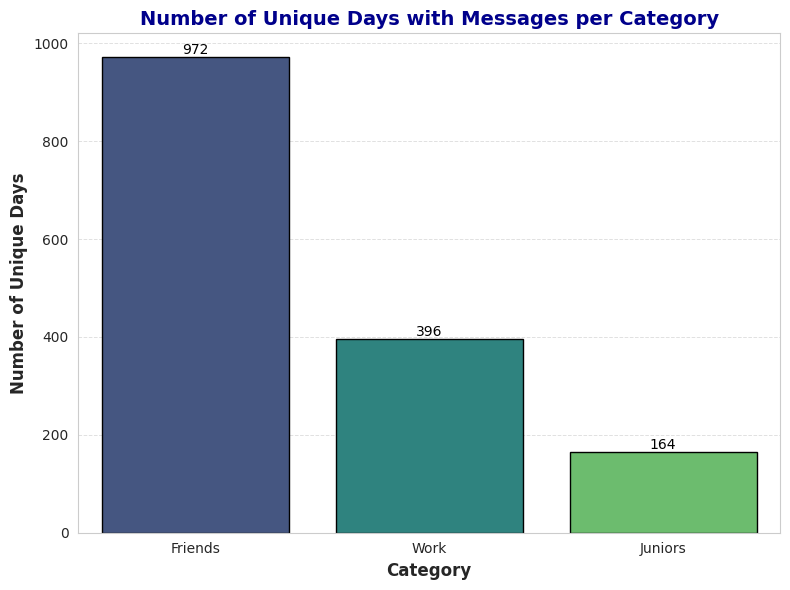

In [32]:
# prompt: calculate number of unique days with messages for work, juniors, friends

# Assuming df_friends, df_Work, and df_Juniors are already defined as in your provided code

# Calculate the number of unique days for each category
unique_days_friends = df_friends['Day'].nunique()
unique_days_work = df_Work['Day'].nunique()
unique_days_juniors = df_Juniors['Day'].nunique()

print(f"Unique days with friends: {unique_days_friends}")
print(f"Unique days with work: {unique_days_work}")
print(f"Unique days with juniors: {unique_days_juniors}")

# Create a bar plot
categories = ['Friends', 'Work', 'Juniors']
unique_days = [unique_days_friends, unique_days_work, unique_days_juniors]

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=unique_days, palette='viridis', edgecolor='black')

# Annotate bars with values
for i, v in enumerate(unique_days):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.ylabel('Number of Unique Days', fontsize=12, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.title('Number of Unique Days with Messages per Category', fontsize=14, fontweight='bold', color='darkblue')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()


In [33]:
# Shift previous message timestamp within each chat
df['Prev_Time'] = df.groupby('Chat')['Datetime'].shift(1)

# Compute time difference in minutes
df['Time_Diff'] = (df['Datetime'] - df['Prev_Time']).dt.total_seconds() / 60

# Ignore time differences greater than 2 days (2880 minutes)
df['Time_Diff'] = df['Time_Diff'].where(df['Time_Diff'] <= 24000, other=None)

# Drop rows where Time_Diff is None (these indicate new conversations)
df = df.dropna(subset=['Time_Diff'])
# Calculate average response time per chat
avg_time_per_chat = df.groupby('Chat')['Time_Diff'].mean().reset_index()

# Rename column for clarity
avg_time_per_chat.columns = ['Chat', 'Avg_Response_Time']

# Merge back with main dataframe
df = df.merge(avg_time_per_chat, on='Chat', how='left')

# Display result
df


Chat        Date   Time  \
0                             Devraj  05/07/2021  19:06   
1                             Devraj  17/07/2021  15:35   
2                             Devraj  22/07/2021  18:44   
3                             Devraj  19/09/2021  19:21   
4                             Devraj  29/09/2021  00:00   
...                              ...         ...    ...   
88097  Ratnesh Pandey Sir IIT Bhilai  24/01/2025  11:57   
88098  Ratnesh Pandey Sir IIT Bhilai  24/01/2025  11:57   
88099  Ratnesh Pandey Sir IIT Bhilai  24/01/2025  11:58   
88100  Ratnesh Pandey Sir IIT Bhilai  04/02/2025  19:22   
88101  Ratnesh Pandey Sir IIT Bhilai  04/02/2025  19:22   

                              Sender  \
0                              Koosh   
1                              Koosh   
2                              Koosh   
3                              Koosh   
4                              Koosh   
...                              ...   
88097                          Koosh   
88098                          Koosh   
88099  Ratnesh Pandey Sir IIT Bhilai   
88100                          Koosh   
88101  Ratnesh Pandey Sir IIT Bhilai   

                                                 Message            Datetime  \
0                                  Bhai jaldi karle call 2021-07-05 19:06:00   
1                                   15 min mein karta hu 2021-07-17 15:35:00   
2                                              2 min ruk 2021-07-22 18:44:00   
3                                                    121 2021-09-19 19:21:00   
4                                   Happy birthday bujh  2021-09-29 00:00:00   
...                                                  ...                 ...   
88097  Dolcera - Mamtha Yadav - 9985858019   , they a... 2025-01-24 11:57:00   
88098              Sir you can once have a word with her 2025-01-24 11:57:00   
88099                        pls share with Satyajit sir 2025-01-24 11:58:00   
88100  Good evening sir , some students have faced is... 2025-02-04 19:22:00   
88101                                     Ask akbassador 2025-02-04 19:22:00   

       Hour         Day    Weekday  Month  Year Month_Name  Word_Count  \
0        19  2021-07-05     Monday      7  2021       July           4   
1        15  2021-07-17   Saturday      7  2021       July           5   
2        18  2021-07-22   Thursday      7  2021       July           3   
3        19  2021-09-19     Sunday      9  2021  September           1   
4         0  2021-09-29  Wednesday      9  2021  September           3   
...     ...         ...        ...    ...   ...        ...         ...   
88097    11  2025-01-24     Friday      1  2025    January          16   
88098    11  2025-01-24     Friday      1  2025    January           9   
88099    11  2025-01-24     Friday      1  2025    January           5   
88100    19  2025-02-04    Tuesday      2  2025   February          33   
88101    19  2025-02-04    Tuesday      2  2025   February           2   

                Prev_Time  Time_Diff  Avg_Response_Time  
0     2021-07-02 13:22:00     4664.0         381.886792  
1     2021-07-05 19:06:00    17069.0         381.886792  
2     2021-07-17 15:35:00     7389.0         381.886792  
3     2021-09-19 19:20:00        1.0         381.886792  
4     2021-09-19 19:21:00    13239.0         381.886792  
...                   ...        ...                ...  
88097 2025-01-24 11:11:00       46.0        1279.259615  
88098 2025-01-24 11:57:00        0.0        1279.259615  
88099 2025-01-24 11:57:00        1.0        1279.259615  
88100 2025-01-24 11:58:00    16284.0        1279.259615  
88101 2025-02-04 19:22:00        0.0        1279.259615  

[88102 rows x 16 columns]

In [34]:
new_df = pd.merge(new_df, avg_time_per_chat, on='Chat', how='left')

# Display the updated DataFrame
new_df

Chat  Total_Messages  Your_Messages  \
0                             Anand IIT Bhilai             414            226   
1                             Arbaz IIT Bhilai            1966            994   
2               Arnav Gautam Bhaiya IIT Bhilai             620            256   
3                             Arpan IIT Bhilai            8840           4964   
4                                   Co-Coordie           25266           9446   
5                                       Devraj            3945           1701   
6                                       Family           10819           5223   
7                                Harshit Verma             994            544   
8                              Harshita School            5084           2279   
9                                       Joseph            6940           3660   
10                                     Junior1             383            171   
11                                     Junior2             481            261   
12                                     Junior3             112             48   
13                                     Junior4             211            103   
14                                     Junior5             281             98   
15                                     Junior6             260            114   
16                                     Junior7             175             75   
17                                     Junior8             129             66   
18                                     Junior9             207            100   
19                         Nidheesh IIT Bhilai             152             80   
20                            Parth IIT Bhilai            1207            702   
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech             565            268   
22               Ratnesh Pandey Sir IIT Bhilai             229            127   
23                    Rishit Bhaiya IIT Bhilai             491            236   
24                             Smit IIT Bhilai            3355           1849   
25                           Srijan IIT Bhilai            3380           1641   
26                       Suraj 2022 IIT Bhilai             663            351   
27                  Talla Sai Surya IIT Bhilai            7547           3920   
28                           Ujjwal IIT Bhilai           13465           6911   
29                           Yuvraj IIT Bhilai            1364            738   

    Percentage_Sent_By_You  junior  work  friend  Average_Length  \
0                54.589372       0     1       0       28.876812   
1                50.559512       0     0       1       31.319939   
2                41.290323       0     1       0       49.664516   
3                56.153846       0     0       1       29.134502   
4                37.386211       0     1       0       32.967308   
5                43.117871       0     0       1       15.451204   
6                48.276181       0     0       1       22.050652   
7                54.728370       0     0       1       21.408451   
8                44.826908       0     1       0       31.825531   
9                52.737752       0     0       1       22.871182   
10               44.647520       1     0       0       34.874674   
11               54.261954       1     0       0       43.222453   
12               42.857143       1     0       0       37.508929   
13               48.815166       1     0       0       33.061611   
14               34.875445       1     0       0       22.338078   
15               43.846154       1     0       0       48.542308   
16               42.857143       1     0       0       52.405714   
17               51.162791       1     0       0       42.573643   
18               48.309179       1     0       0       41.241546   
19               52.631579       0     1       0       58.197368   
20               58.160729       0     1       0       35.427506   
21               47.433628       0

In [35]:
# prompt: rename cluster col in new_df to responseness_Activity and make other changes

# Rename the 'cluster' column to 'responseness_Activity'
new_df = new_df.rename(columns={'Cluster': 'responseness_Activity'})

# Assuming 'new_df' now includes 'Avg_Response_Time' from the previous code.
# If not, you'll need to add that merge operation back in.

# Now, perform other changes you mentioned but weren't specified.
# Provide those details and I'll complete the code accordingly.


In [36]:
new_df

Chat  Total_Messages  Your_Messages  \
0                             Anand IIT Bhilai             414            226   
1                             Arbaz IIT Bhilai            1966            994   
2               Arnav Gautam Bhaiya IIT Bhilai             620            256   
3                             Arpan IIT Bhilai            8840           4964   
4                                   Co-Coordie           25266           9446   
5                                       Devraj            3945           1701   
6                                       Family           10819           5223   
7                                Harshit Verma             994            544   
8                              Harshita School            5084           2279   
9                                       Joseph            6940           3660   
10                                     Junior1             383            171   
11                                     Junior2             481            261   
12                                     Junior3             112             48   
13                                     Junior4             211            103   
14                                     Junior5             281             98   
15                                     Junior6             260            114   
16                                     Junior7             175             75   
17                                     Junior8             129             66   
18                                     Junior9             207            100   
19                         Nidheesh IIT Bhilai             152             80   
20                            Parth IIT Bhilai            1207            702   
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech             565            268   
22               Ratnesh Pandey Sir IIT Bhilai             229            127   
23                    Rishit Bhaiya IIT Bhilai             491            236   
24                             Smit IIT Bhilai            3355           1849   
25                           Srijan IIT Bhilai            3380           1641   
26                       Suraj 2022 IIT Bhilai             663            351   
27                  Talla Sai Surya IIT Bhilai            7547           3920   
28                           Ujjwal IIT Bhilai           13465           6911   
29                           Yuvraj IIT Bhilai            1364            738   

    Percentage_Sent_By_You  junior  work  friend  Average_Length  \
0                54.589372       0     1       0       28.876812   
1                50.559512       0     0       1       31.319939   
2                41.290323       0     1       0       49.664516   
3                56.153846       0     0       1       29.134502   
4                37.386211       0     1       0       32.967308   
5                43.117871       0     0       1       15.451204   
6                48.276181       0     0       1       22.050652   
7                54.728370       0     0       1       21.408451   
8                44.826908       0     1       0       31.825531   
9                52.737752       0     0       1       22.871182   
10               44.647520       1     0       0       34.874674   
11               54.261954       1     0       0       43.222453   
12               42.857143       1     0       0       37.508929   
13               48.815166       1     0       0       33.061611   
14               34.875445       1     0       0       22.338078   
15               43.846154       1     0       0       48.542308   
16               42.857143       1     0       0       52.405714   
17               51.162791       1     0       0       42.573643   
18               48.309179       1     0       0       41.241546   
19               52.631579       0     1       0       58.197368   
20               58.160729       0     1       0       35.427506   
21               47.433628       0

<ipython-input-37-bf9c96b2bdcd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


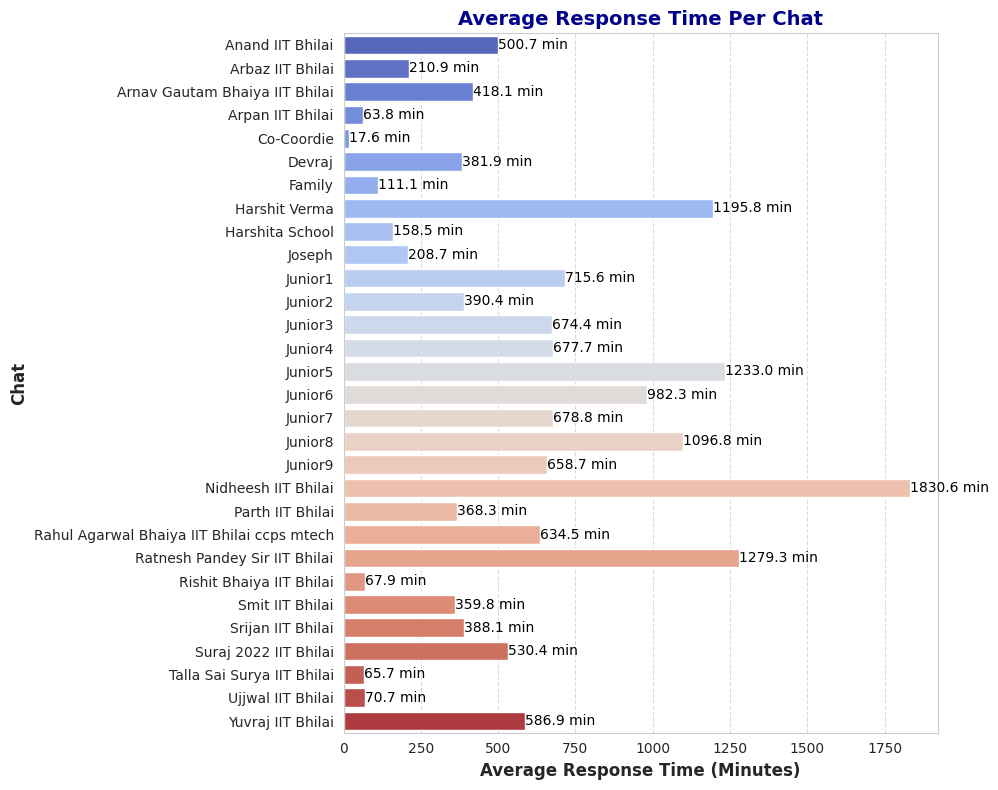

In [37]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x=avg_time_per_chat['Avg_Response_Time'],
    y=avg_time_per_chat['Chat'],
    palette='coolwarm'
)
# Annotate each bar with the value for better visibility
for i, value in enumerate(avg_time_per_chat['Avg_Response_Time']):
    plt.text(value + 0.2, i, f"{value:.1f} min", va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Average Response Time (Minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Chat', fontsize=12, fontweight='bold')
plt.title('Average Response Time Per Chat', fontsize=14, fontweight='bold', color='darkblue')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensures no cutoff of labels
plt.show()


In [38]:
def time_dif(df) :
 df['Prev_Time'] = df.groupby('Chat')['Datetime'].shift(1)

 # Compute time difference in minutes
 df['Time_Diff'] = (df['Datetime'] - df['Prev_Time']).dt.total_seconds() / 60

 # Ignore time differences greater than 2 days (2880 minutes)
 df['Time_Diff'] = df['Time_Diff'].where(df['Time_Diff'] <= 24000, other=None)

 # Drop rows where Time_Diff is None (these indicate new conversations)
 df = df.dropna(subset=['Time_Diff'])
 # Calculate average response time per chat
 avg_time_per_chat = df.groupby('Chat')['Time_Diff'].mean().reset_index()

 # Rename column for clarity
 avg_time_per_chat.columns = ['Chat', 'Avg_Response_Time']

 # Merge back with main dataframe
 df = df.merge(avg_time_per_chat, on='Chat', how='left')

 # Display result
 df

In [39]:
time_dif(df_Work)
time_dif(df_friends)
time_dif(df_Juniors)


<ipython-input-40-7ef29da92473>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Work', 'Friends', 'Juniors'], y=[avg_response_work, avg_response_friends, avg_response_juniors], palette='viridis')


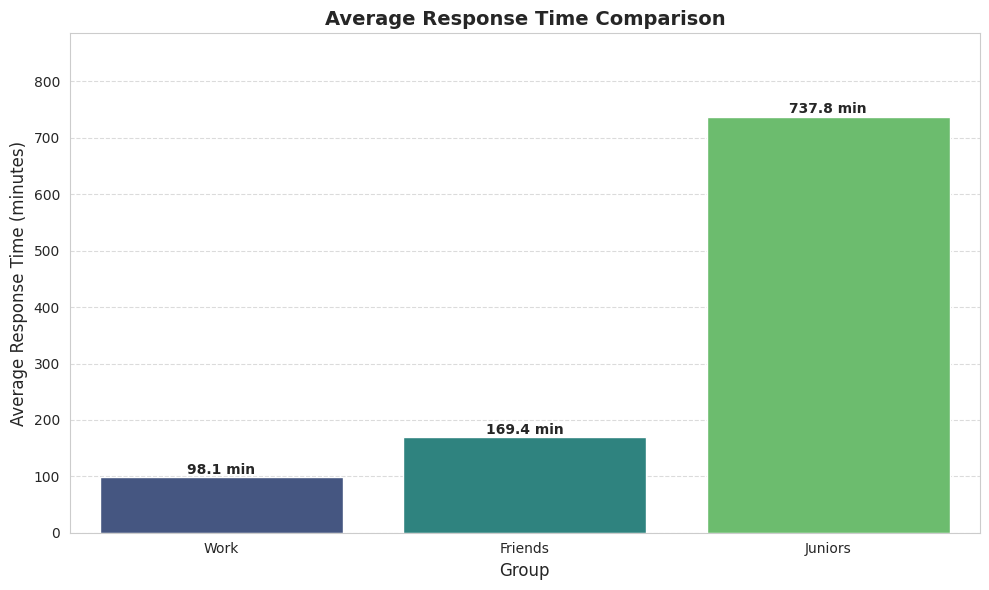

In [40]:
# prompt: draw a graph great asthetics comparing avg time diff between df_work, df_friends, df_junior

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_work, df_friends, and df_junior have 'Avg_Response_Time' calculated as shown in the previous code.
# Calculate the average response time for each group
avg_response_work = df_Work['Time_Diff'].mean()
avg_response_friends = df_friends['Time_Diff'].mean()
avg_response_juniors = df_Juniors['Time_Diff'].mean()


# Create the bar plot with improved aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x=['Work', 'Friends', 'Juniors'], y=[avg_response_work, avg_response_friends, avg_response_juniors], palette='viridis')

# Customize the plot elements
plt.xlabel('Group', fontsize=12)
plt.ylabel('Average Response Time (minutes)', fontsize=12)
plt.title('Average Response Time Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, max(avg_response_work, avg_response_friends, avg_response_juniors) * 1.2)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Annotate the bars with their values
for i, v in enumerate([avg_response_work, avg_response_friends, avg_response_juniors]):
    plt.text(i, v + 0.2, f'{v:.1f} min', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [41]:
# prompt: remove self from df chat self

# Assuming 'df' is your DataFrame as defined in the provided code.
# Remove rows where the sender is "self"

avg_time_per_chat = avg_time_per_chat[avg_time_per_chat['Chat'] != 'Self']
avg_time_per_chat


Chat  Avg_Response_Time
0                             Anand IIT Bhilai         500.696629
1                             Arbaz IIT Bhilai         210.927419
2               Arnav Gautam Bhaiya IIT Bhilai         418.099825
3                             Arpan IIT Bhilai          63.826204
4                                   Co-Coordie          17.587220
5                                       Devraj         381.886792
6                                       Family         111.143134
7                                Harshit Verma        1195.810169
8                              Harshita School         158.542030
9                                       Joseph         208.658559
10                                     Junior1         715.603306
11                                     Junior2         390.442857
12                                     Junior3         674.368932
13                                     Junior4         677.746032
14                                     Junior5        1232.995192
15                                     Junior6         982.295154
16                                     Junior7         678.783133
17                                     Junior8        1096.815126
18                                     Junior9         658.671875
19                         Nidheesh IIT Bhilai        1830.606061
20                            Parth IIT Bhilai         368.263432
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech         634.515810
22               Ratnesh Pandey Sir IIT Bhilai        1279.259615
23                    Rishit Bhaiya IIT Bhilai          67.932584
24                             Smit IIT Bhilai         359.813165
25                           Srijan IIT Bhilai         388.056870
26                       Suraj 2022 IIT Bhilai         530.359300
27                  Talla Sai Surya IIT Bhilai          65.679849
28                           Ujjwal IIT Bhilai          70.698684
29                           Yuvraj IIT Bhilai         586.937952

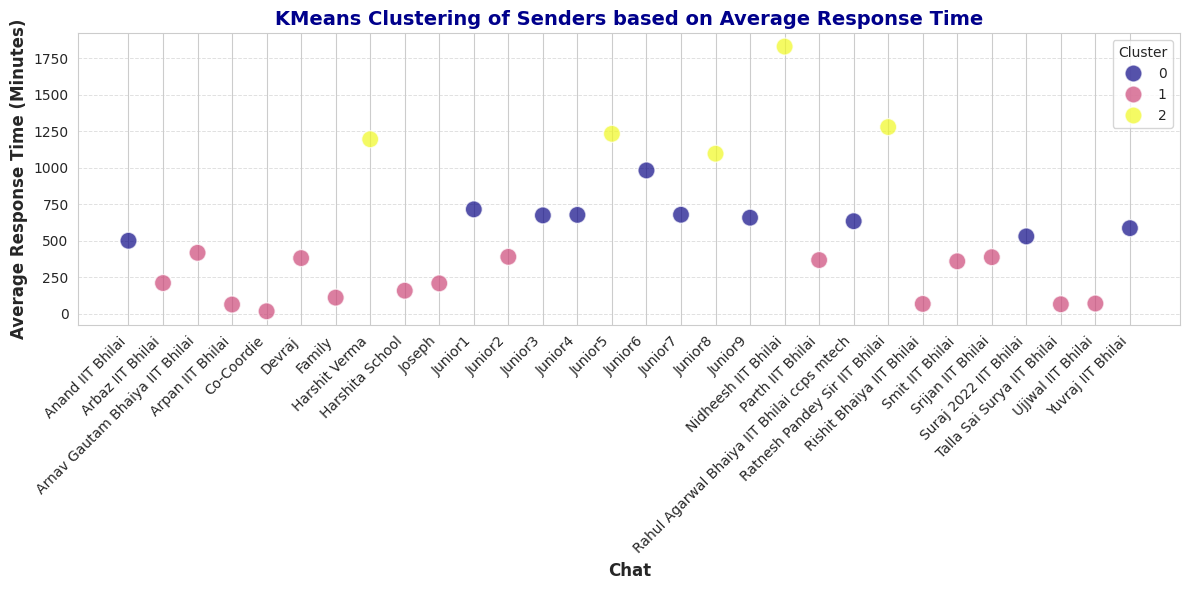

In [42]:
# prompt: use k means to cluster senders on basis of avg response time and plot graph nea and tidy with proper labels

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans




X = avg_time_per_chat[['Avg_Response_Time']] # Features for clustering



# Apply KMeans clustering (example with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)  # Choose the number of clusters as needed
kmeans.fit(X)

# Add cluster labels to the dataframe
avg_time_per_chat['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Chat',
    y='Avg_Response_Time',
    hue='Cluster',
    data=avg_time_per_chat,
    palette='plasma',  # A more vibrant and attractive palette
    s=150,  # Larger marker size for better visibility
    alpha=0.7  # Add transparency to avoid overlapping issues
)

# Rotate labels and format axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Chat', fontsize=12, fontweight='bold')
plt.ylabel('Average Response Time (Minutes)', fontsize=12, fontweight='bold')
plt.title('KMeans Clustering of Senders based on Average Response Time', fontsize=14, fontweight='bold', color='darkblue')

# Optional: Add grid for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Ensure tight layout to prevent label cutoff
plt.tight_layout()
plt.show()


In [43]:
# prompt: calculate total words used and total number of messages

# Calculate total words used
total_words = df['Word_Count'].sum()
print(f"Total words used in all chats: {total_words}")

# Calculate total number of messages
total_messages = len(df)
print(f"Total number of messages in all chats: {total_messages}")


Total words used in all chats: 505547
Total number of messages in all chats: 88102


In [44]:
new_df
new_df = new_df.drop(columns=['Your_Messages'])
new_df

Chat  Total_Messages  \
0                             Anand IIT Bhilai             414   
1                             Arbaz IIT Bhilai            1966   
2               Arnav Gautam Bhaiya IIT Bhilai             620   
3                             Arpan IIT Bhilai            8840   
4                                   Co-Coordie           25266   
5                                       Devraj            3945   
6                                       Family           10819   
7                                Harshit Verma             994   
8                              Harshita School            5084   
9                                       Joseph            6940   
10                                     Junior1             383   
11                                     Junior2             481   
12                                     Junior3             112   
13                                     Junior4             211   
14                                     Junior5             281   
15                                     Junior6             260   
16                                     Junior7             175   
17                                     Junior8             129   
18                                     Junior9             207   
19                         Nidheesh IIT Bhilai             152   
20                            Parth IIT Bhilai            1207   
21  Rahul Agarwal Bhaiya IIT Bhilai ccps mtech             565   
22               Ratnesh Pandey Sir IIT Bhilai             229   
23                    Rishit Bhaiya IIT Bhilai             491   
24                             Smit IIT Bhilai            3355   
25                           Srijan IIT Bhilai            3380   
26                       Suraj 2022 IIT Bhilai             663   
27                  Talla Sai Surya IIT Bhilai            7547   
28                           Ujjwal IIT Bhilai           13465   
29                           Yuvraj IIT Bhilai            1364   

    Percentage_Sent_By_You  junior  work  friend  Average_Length  \
0                54.589372       0     1       0       28.876812   
1                50.559512       0     0       1       31.319939   
2                41.290323       0     1       0       49.664516   
3                56.153846       0     0       1       29.134502   
4                37.386211       0     1       0       32.967308   
5                43.117871       0     0       1       15.451204   
6                48.276181       0     0       1       22.050652   
7                54.728370       0     0       1       21.408451   
8                44.826908       0     1       0       31.825531   
9                52.737752       0     0       1       22.871182   
10               44.647520       1     0       0       34.874674   
11               54.261954       1     0       0       43.222453   
12               42.857143       1     0       0       37.508929   
13               48.815166       1     0       0       33.061611   
14               34.875445       1     0       0       22.338078   
15               43.846154       1     0       0       48.542308   
16               42.857143       1     0       0       52.405714   
17               51.162791       1     0       0       42.573643   
18               48.309179       1     0       0       41.241546   
19               52.631579       0     1       0       58.197368   
20               58.160729       0     1       0       35.427506   
21               47.433628       0     1       0       42.605310   
22               55.458515       0     1       0       40.720524   
23               48.065173       0     1       0       34.073320   
24               55.111773       0     0       1       25.236662   
25               48.550296       0     0       1       21.724556   
26               52.941176       0     1       0       30.105581   
27               51.941169       0     0       1       25.775142   
28               51.325

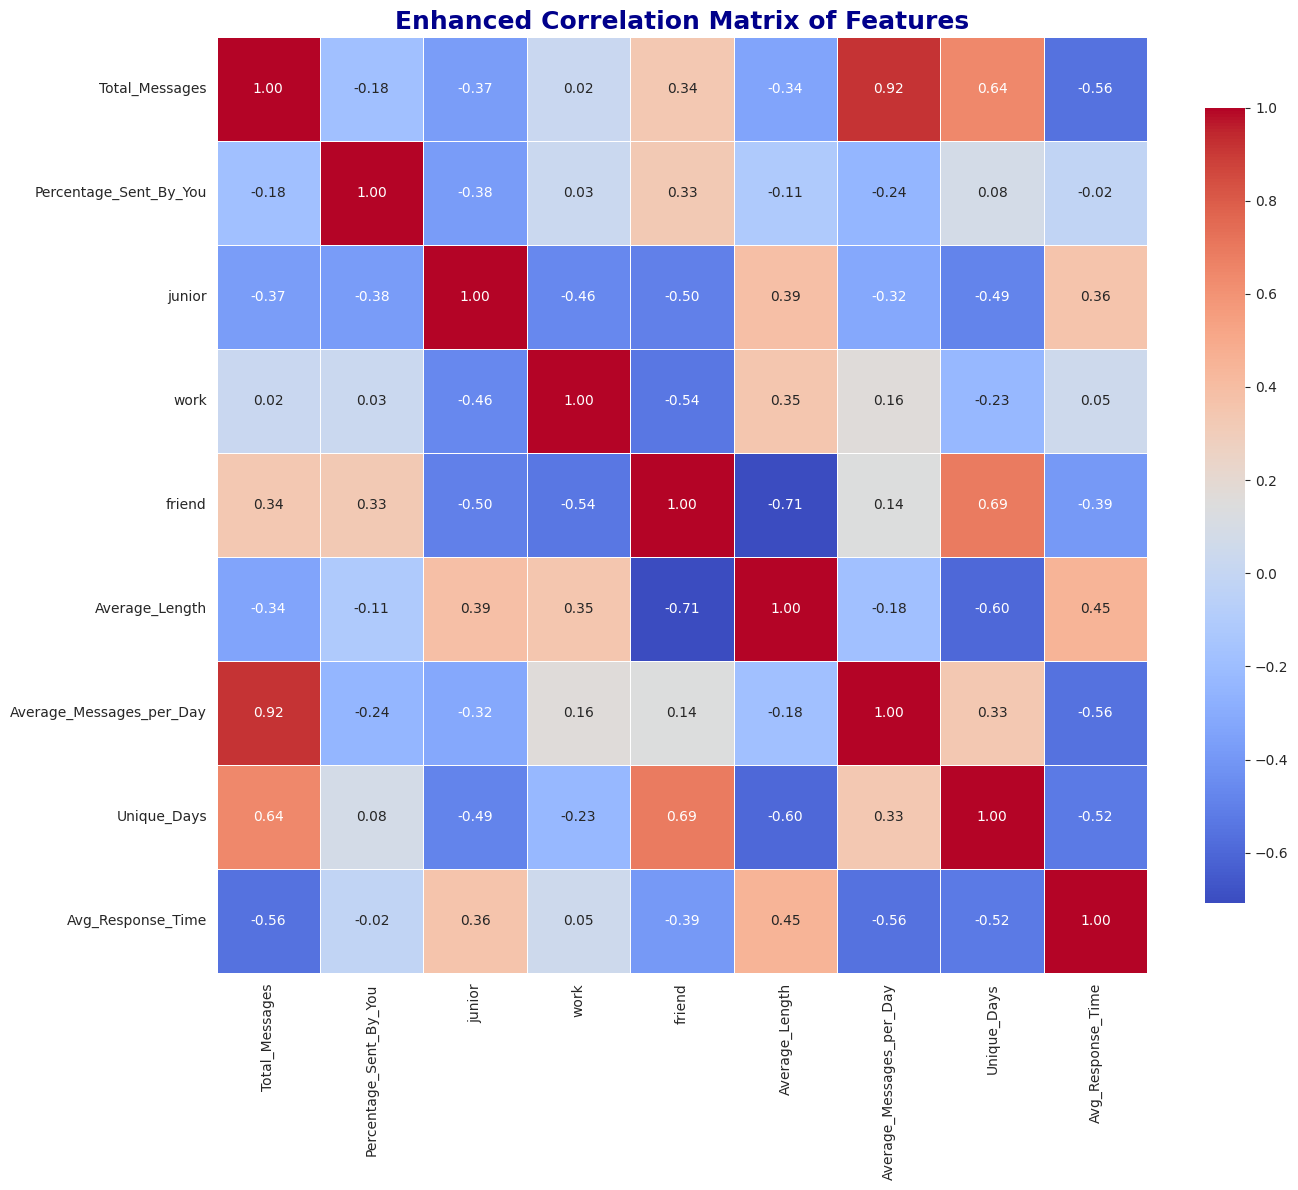

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    new_df.iloc[:, 1:].corr(),
    annot=True,
    cmap='coolwarm',  # Retain the original color palette
    fmt=".2f",
    linewidths=0.7,  # Add borders between cells
    annot_kws={"size": 10},  # Increased font size for annotations
    cbar_kws={'shrink': 0.85}  # Shrink color bar for proportion
)

# Title and formatting
plt.title('Enhanced Correlation Matrix of Features', fontsize=18, fontweight='bold', color='darkblue')

# Tight layout to ensure no cut-off
plt.tight_layout()
plt.show()
